# Primer entrega
 
Llegamos al final del primer sprint y estamos en condiciones de analizar un dataset, entrenar un primer modelo (de regresión o clasificación) y evaluar resultados.
 
En este proyecto, trabajaremos con un dataset que contiene información sobre personas. La idea es predecir si la persona tiene un salario anual mayor a 50K dólares.
 
### Consignas:

A diferencia de los trabajos que venimos haciendo en clases, en los cuáles nos íbamos guiando por consignas o tips en un notebook, en este caso les toca a ustedes definir qué análisis les parece necesario hacer, qué algoritmo utilizar y qué métrica medir (justificando por qué).
 
La idea es que el notebook sea una especie de "informe" en el que ustedes puedan explicar de forma simple a una persona cualquiera lo que hicieron. Aprovechen las celdas de texto y agreguen los gráficos que les parezca necesarios. Como primer paso, deben identificar si se trata de un problema de regresión o clasificación, hacer un análisis exploratorio de los datos (presentando conclusiones siempre) y finalmente entrenar un modelo para generar sus predicciones.
 
Si les es útil, pueden agregar datos de otras fuentes (por ejemplo datasets públicos del país, o lo que sea) siempre justificando sus decisiones.
 
Son libres de probar cualquiera de los modelos que vimos, pueden dejar los resultados de todo lo que prueben con sus correspondientes conclusiones para mostrar cómo llegan al resultado final.

Se les entrega 3 archivos:
- train.csv: Es el dataset que utilizarán para entrenar su modelo. Contiene features y el target
- test.csv: Este archivo, contiene únicamente features (incluyendo el ID de la persona). Ustedes deben predecir el target para todas estas personas y armar un archivo que contenga las columnas ID, PRED 
- submit_example.csv: El archivo que entreguen tiene que tener exactamente este formato, pero con sus predicciones. Es decir, tiene que contener las columnas ID (que se corresponde al ID de la persona en el set test.csv) y PRED (que toma los valores 1 y 0. 1 significa que la persona gana más de 50K y 0 significa que no).

Deben entregar:
- Notebook con análisis e implementación del modelo predictivo
- Archivo en formato csv con las predicciones para el set de test.

## A tener en cuenta

- En la columna workclass van a ver los valores: 'Self-emp-not-inc' y 'Self-emp-inc' [acá](https://smallbiztrends.com/2013/11/incorporated-versus-unincorporated-self-employment.html) pueden encontrar info sobre su significado.
- Con pandas tienen la función to_csv que les permite exportar un dataframe a csv. Recuerden que tienen que especificar en el parámetro index, que no quieren que el index quede en el archivo csv.

## Archivos

Los archivos necesarios pueden descargarlos de los siguientes links:

- [train.csv](https://drive.google.com/file/d/1fpy7JaVdFlFPHa3kWKmem_E4O7NqhBax/view?usp=sharing)
- [test.csv](https://drive.google.com/file/d/1z927EgBNSOJ3iWorIGz2XEjlrfD0Koaw/view?usp=sharing)
- [submit_example.csv](https://drive.google.com/file/d/1JAdndD1u1F2_TzM-uhArTWW7eepupmuZ/view?usp=sharing)

## Fecha de entrega

La entrega se tiene que enviar por mail (puede ser un link a google drive) a alexispacek@gmail.com.

1 entrega por grupo.

Por favor indicar el nombre de todos los integrantes en el mail o al comienzo del notebook.

Fecha limite: Domingo 13 de Noviembre.

# Integrantes

- Cornelio, Edgardo
- Parra Iván

# Repositorio

https://github.com/ivanjavierparra/DataScience-Sprint1.git

# Introducción

En este proyecto, trabajaremos con un dataset que contiene información sobre personas. 

La idea es predecir si la persona tiene un salario anual mayor a 50K dólares, para lo cual se comenzará con un análisis exploratorio del dataset para finalmente construir una serie de modelos que permitan predecir esto.

El proyecto está dividido en las siguientes secciones:
- Análisis Exploratorio
- Variables Categóricas
- Variables Numéricas
- Target
- Limpieza de Outliers
- Análisis de Variables
- Correlaciones entre Variables
- Separación de datos: Train Test Split
- Preprocessing
- Modelos
- Modelo 1: Baseline
- Modelo 2: DecisionTreeClassifier
- Modelo 3: K-NeighboursClassifier
- Modelo 4: RandomForestClassifier
- Comparación de Modelos
- Conclusión

# Análisis exploratorio

En esta sección lo que se realizará es una análisis exploratorio del dataset, esto implica mostrar la cantidad de filas y columnas, cantidad de nulos, descripción estadística de cada una de las variables numéricas, gráficos de tipo countoplot para variables categóricas e histogramas para las variables numéricas. 

In [258]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import numpy as np

Levantamos el archivo

In [173]:
df = pd.read_csv('CSV/train.csv')

Mostramos las 5 primeras filas

In [476]:
df.head()

,index,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,ID
0,24466,30,Local-gov,HS-grad,9,Divorced,Protective-serv,Own-child,White,Female,0,0,32,United-States,<=50K,24451
1,985,37,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,1848,40,United-States,>50K,985
2,30250,41,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,60,United-States,>50K,30229
3,7107,45,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,>50K,7107
4,27656,28,Private,HS-grad,9,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,40,United-States,<=50K,27639


#### Diccionario de datos

A continuación describimos el significado de cada una de las variables del dataset:
- index: número entero que representa el ID del dataset.
- age: número entero que representa la edad de la persona.
- workclass: descripción del trabajo de la persona.
    - Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- education: nivel educativo de la persona.
    - Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: número entero que representa el id de la variable "education".
- marital-status: estado civil de la persona.
    - Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: ocupación de la persona.
    - Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: descripción del estado matrimonial/familiar de la persona.
    - Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: raza de la persona.
    - White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: sexo de la persona.
    - Female, Male.
- capital-gain: variable numérica que indica el ingreso semanal de una persona.
- capital-loss: variable numérica que indica el capital semanal perdido de una persona.
- hours-per-week: variable numérica que indica la cantidad de horas que trabaja la persona por semana.
- native-country: país donde reside la persona.
    - United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
- income: indica si la persona tienen un ingreso anual menor-igual a 50K o mayor a 50K.
    - <=50K, >50K
- ID: entero que representa la primary key de la persona.

Cantidad de columnas y filas

In [174]:
print(f"Columnas: {df.shape[1]}")
print(f"Filas: {df.shape[0]}")

Columnas: 16
Filas: 27656


Descripción de las variables

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27656 entries, 0 to 27655
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   index           27656 non-null  int64 
 1   age             27656 non-null  int64 
 2   workclass       27656 non-null  object
 3   education       27656 non-null  object
 4   education.num   27656 non-null  int64 
 5   marital.status  27656 non-null  object
 6   occupation      27656 non-null  object
 7   relationship    27656 non-null  object
 8   race            27656 non-null  object
 9   sex             27656 non-null  object
 10  capital.gain    27656 non-null  int64 
 11  capital.loss    27656 non-null  int64 
 12  hours.per.week  27656 non-null  int64 
 13  native.country  27656 non-null  object
 14  income          27656 non-null  object
 15  ID              27656 non-null  int64 
dtypes: int64(7), object(9)
memory usage: 3.4+ MB


Tenemos un total de 7 columnas de tipo numérico.

Cantidad de nulos

In [142]:
df.isna().sum()

index             0
age               0
workclass         0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
ID                0
dtype: int64

Vemos que no tenemos datos nulos en nuestro dataset

Descripción estadística de las variables numéricas

In [143]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
index,27656.0,16274.894851,9410.041750,0.0,8104.75,16296.0,24431.25,32559.0
age,27656.0,38.610356,13.659928,17.0,28.00,37.0,48.00,90.0
education.num,27656.0,10.093506,2.566083,1.0,9.00,10.0,12.00,16.0
capital.gain,27656.0,1099.991503,7487.323462,0.0,0.00,0.0,0.00,99999.0
capital.loss,27656.0,88.284387,405.821328,0.0,0.00,0.0,0.00,4356.0
hours.per.week,27656.0,40.446666,12.369212,1.0,40.00,40.0,45.00,99.0
ID,27656.0,16267.565736,9403.092602,0.0,8104.75,16291.0,24416.25,32535.0


La edad promedio de las personas es 38 años y la cantidad de horas que trabajan semanalmente es 40hs

Definimos algunas funciones que serán necesarias en varias partes de este notebook.

In [178]:
def mostrar_unique_categorical(df, categorical_features):
    for col in categorical_features:
        print(col)
        print(df[col].unique())
        print()

def mostrar_unique_numerical(df, numerical_features):
    for col in numerical_features:
        print(col)
        print(np.sort(df[col].unique()))
        print()

Mostramos los distintos valores que adoptan cada una de las variables categóricas 

In [179]:
categorical_features = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country', 'income']

mostrar_unique_categorical(df, categorical_features)

workclass
['Local-gov' 'Private' 'Federal-gov' 'Self-emp-not-inc' '?' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']

education
['HS-grad' 'Bachelors' 'Some-college' '7th-8th' 'Assoc-voc' 'Masters'
 'Assoc-acdm' '1st-4th' '5th-6th' 'Prof-school' '9th' '10th' '11th' '12th'
 'Doctorate' 'Preschool']

marital.status
['Divorced' 'Married-civ-spouse' 'Never-married' 'Widowed' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']

occupation
['Protective-serv' 'Exec-managerial' 'Craft-repair' 'Prof-specialty'
 'Tech-support' 'Other-service' 'Transport-moving' 'Adm-clerical'
 'Farming-fishing' 'Handlers-cleaners' '?' 'Sales' 'Machine-op-inspct'
 'Priv-house-serv' 'Armed-Forces']

relationship
['Own-child' 'Wife' 'Husband' 'Not-in-family' 'Unmarried' 'Other-relative']

race
['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']

sex
['Female' 'Male']

native.country
['United-States' '?' 'Jamaica' 'India' 'Mexico' 'Philippines'
 'Dominican-Republic' 'El-Salvador' 'Ch

Mostramos los distintos valores que adoptan cada una de las variables numéricas 

In [180]:
numerical_features = ['age', 'capital.gain', 'capital.loss', 'hours.per.week','education.num']
#numerical_features = df.select_dtypes(include = ['number']).columns       
mostrar_unique_numerical(df, numerical_features)

age
[17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40
 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64
 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88
 90]

capital.gain
[    0   114   401   594   914   991  1055  1086  1111  1151  1173  1409
  1424  1455  1471  1506  1639  1797  1831  1848  2009  2036  2050  2062
  2105  2174  2176  2202  2228  2290  2329  2346  2354  2387  2407  2414
  2463  2538  2580  2597  2635  2653  2829  2885  2907  2936  2961  2964
  2977  2993  3103  3137  3273  3325  3411  3418  3432  3456  3464  3471
  3674  3781  3818  3887  3908  3942  4064  4101  4386  4416  4508  4650
  4687  4787  4865  4931  4934  5013  5060  5178  5455  5556  5721  6360
  6418  6497  6514  6723  6767  6849  7298  7430  7443  7688  7896  7978
  8614  9386  9562 10520 10566 10605 11678 13550 14084 14344 15020 15024
 15831 18481 20051 22040 25124 25236 27828 34095 41310 99999]

capital.loss
[   0  155  213  323  419

Podemos observar que education.num es el id del feature education. A continuación mostramos esto.

In [181]:
df[['education.num', 'education']].drop_duplicates().sort_values('education.num')


,education.num,education
833,1,Preschool
24,2,1st-4th
32,3,5th-6th
9,4,7th-8th
41,5,9th
85,6,10th
92,7,11th
113,8,12th
0,9,HS-grad
6,10,Some-college


La variable education.num está ordenada ascendentemente y cuando mayor es su valor implica un nivel educativo superior.

# Variables categóricas

Definimos una función para graficar variables categóricas

In [184]:
def graficar_distribucion_categoricas(df, categorical_features):
    ncount=len(df)    

    for i, feature in enumerate(categorical_features):

        plt.figure(figsize=(20,4))
        
        ax = sns.countplot(x=df[feature], order=df[feature].value_counts().index)
        ax.set_title(f'Countplot {feature}',fontdict={'fontsize': 12,'fontweight':'bold'})
        ax.tick_params(axis='x', rotation=45)
        
        
        for p in ax.patches:
            x=p.get_bbox().get_points()[:,0]
            y=p.get_bbox().get_points()[1,1]
            ax.annotate('   {:.2f}% '.format(100.*y/ncount), (x.mean(), y), 
                ha='center', va='bottom',rotation=45)
        
        plt.xticks(rotation=90)
        plt.show()

Generamos un countplot para cada una de las features categóricas de nuestro dataset

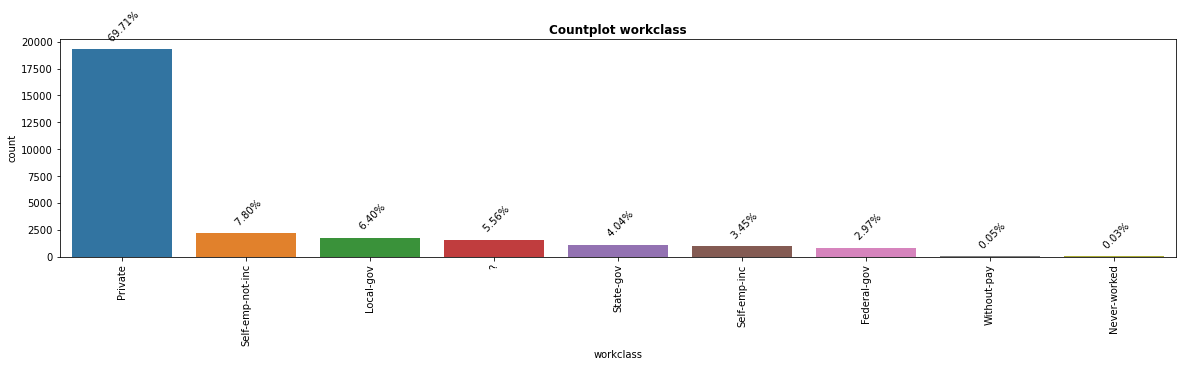

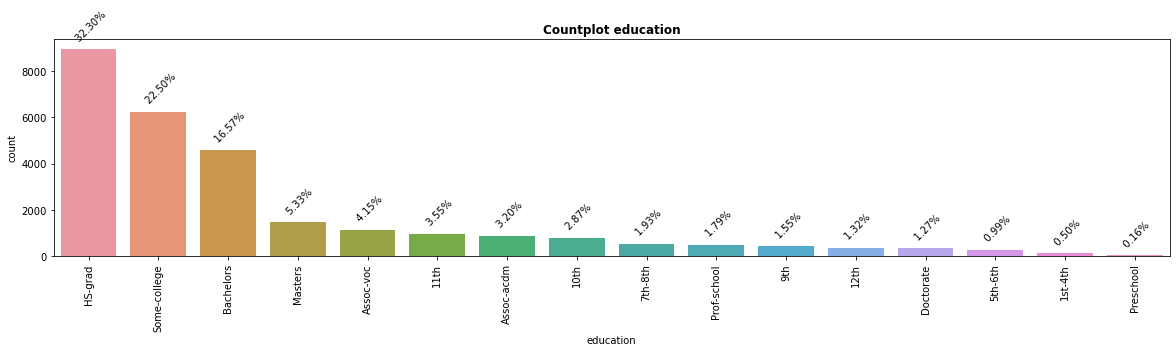

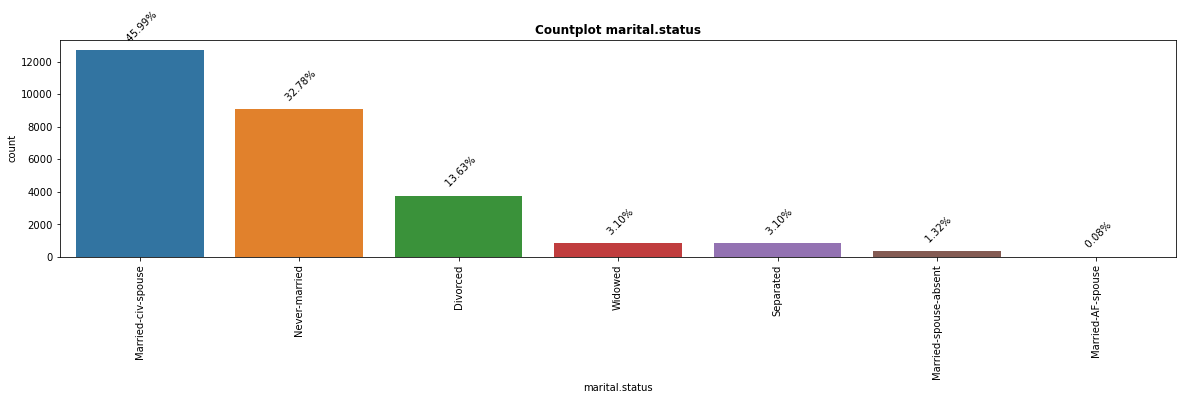

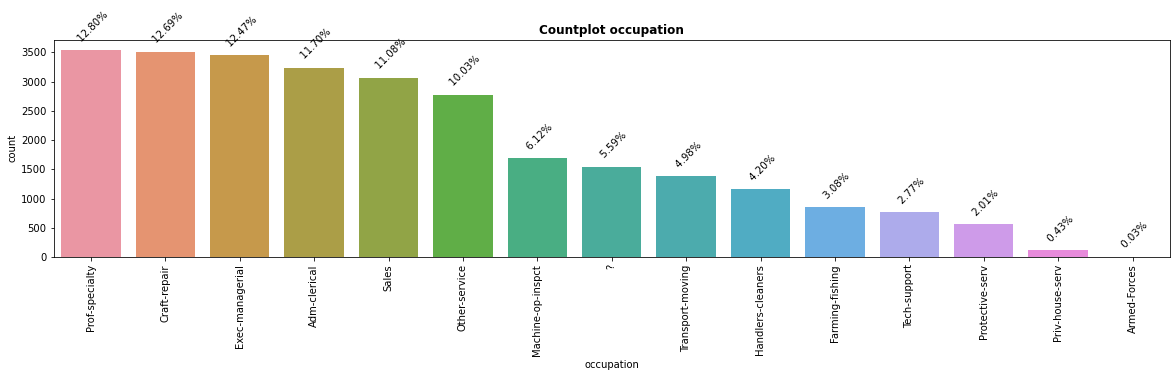

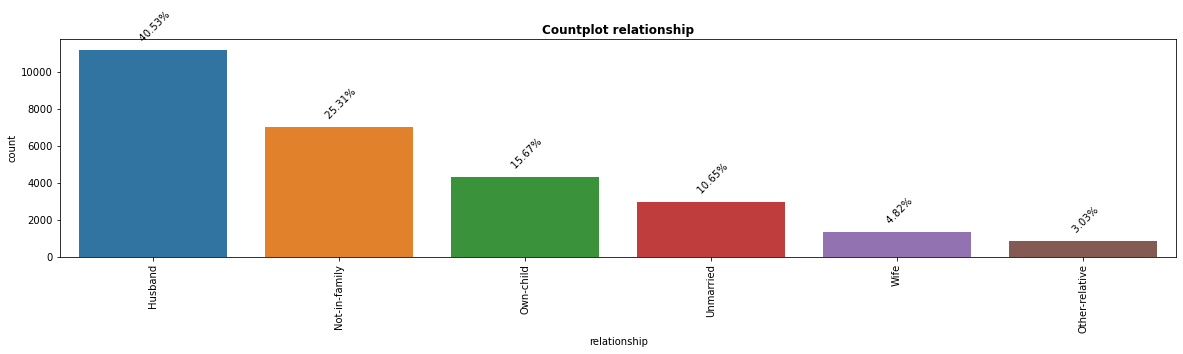

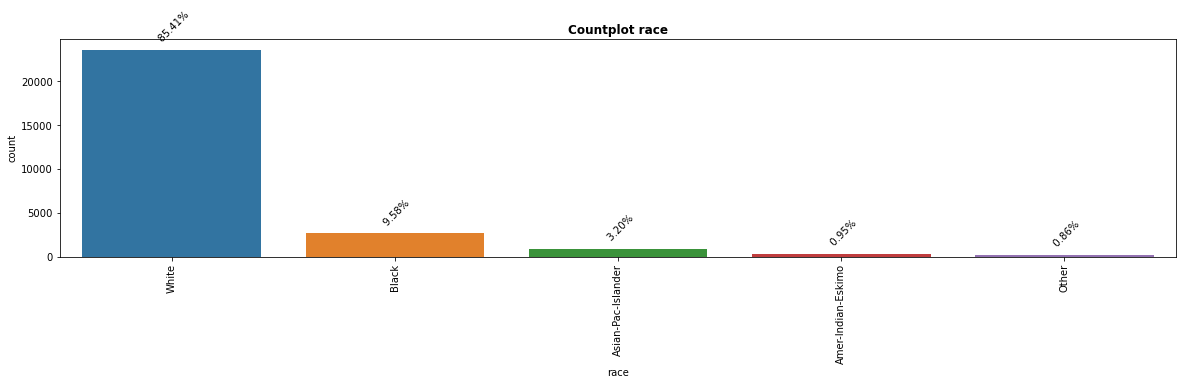

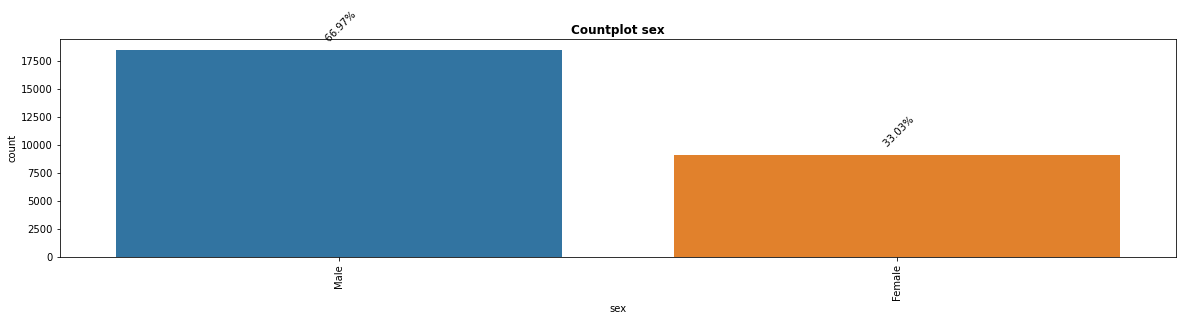

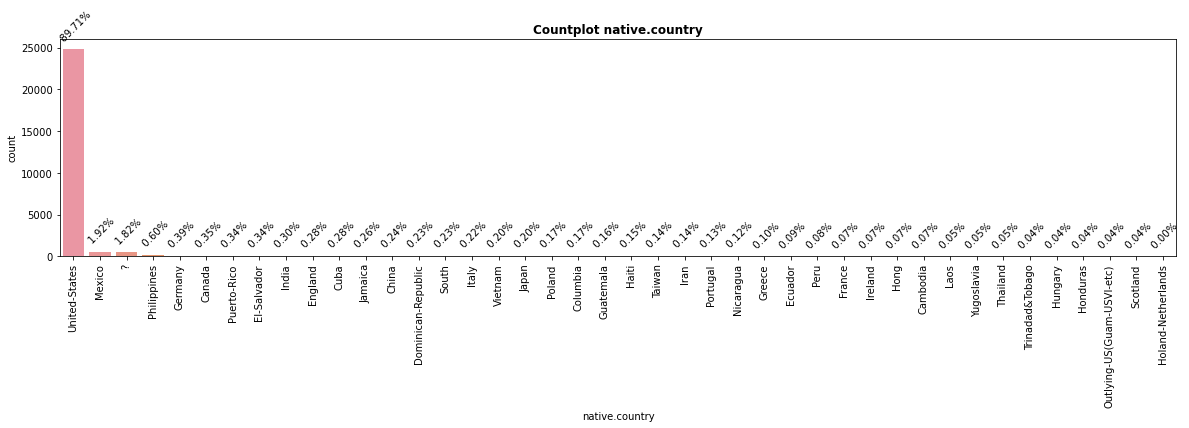

In [183]:
categorical_features = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex',  'native.country']

graficar_distribucion_categoricas(df, categorical_features)

#####  Conclusiones
- En Workclass podemos ver que predomina la clase privada.
- education contiene mayoritariamente personas que terminaron la securndaria.
- marital.status contiene mayoritariamete personas que estan casadas.
- En occupation vemos que tenemos 5 categorias predominantes.
- En relationship vemos que la mayoria son esposos.
- En race la mayoria son de raza blanca.
- En sex la mayoria son hombre y se ve también con la variable realtionship.
- En native.country la mayoría de las personas son de United-States.

# Variables numéricas

Creamos función genérica para graficar variables numéricas del dataset

In [185]:
def graficar_distribucion_numericas(df, numerical_features):
    
    sns.set(style="darkgrid")

    for i, feature in enumerate(numerical_features):
        plt.figure(figsize=(18,10))
        ax1 = plt.subplot2grid((2, 2), (0, 0), colspan=30)
        # bottom left
        ax2 = plt.subplot2grid((2, 2), (1, 0))
        # bottom right
        ax3 = plt.subplot2grid((2, 2), (1, 1))
    
     
        ax1 = sns.kdeplot(x=df[feature], ax=ax1, shade=False, color='crimson')
        ax1.set_title(f'kdeplot {feature}',fontdict={'fontsize': 12,'fontweight':'bold'})
        kdeline = ax1.lines[0]
        mean = df[feature].mean()
        median = df[feature].median()
        xs = kdeline.get_xdata()
        ys = kdeline.get_ydata()
        height = np.interp(mean, xs, ys)
        height1 = np.interp(median, xs, ys)
        ax1.vlines(mean, 0, height, color='crimson', ls=':')
        ax1.vlines(median, 0, height1, color='darkviolet', ls=':')
        ax1.fill_between(xs, 0, ys, facecolor='crimson', alpha=0.2)
        
        ax2 = sns.histplot(x=df[feature], ax=ax2, kde=True)
        ax2.set_title(f'Histplot {feature}',fontdict={'fontsize': 12,'fontweight':'bold'})
        
        ax3= sns.boxplot(x=df[feature], ax=ax3)
        ax3.set_title(f'Boxplot {feature}',fontdict={'fontsize': 12,'fontweight':'bold'})
        
        plt.show()
        
    plt.tight_layout()
    plt.show()

Definimos las features numéricas a graficar

In [186]:
numerical_features = ['age', 'capital.gain', 'capital.loss', 'hours.per.week','education.num']

Graficamos las features numéricas con un histpot, boxplot y kdeplot marcando la media y la mediana

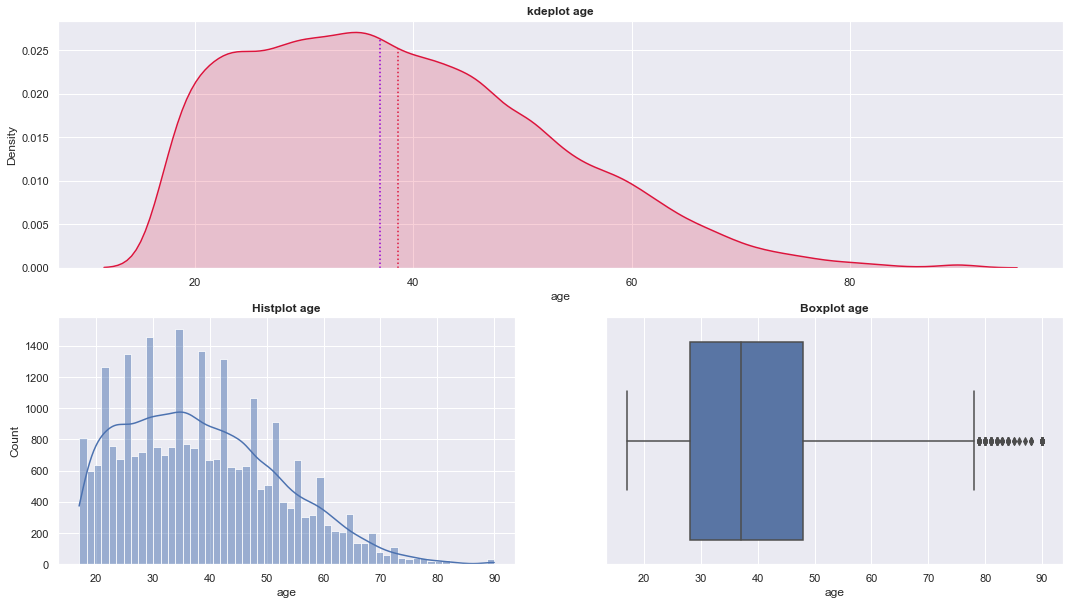

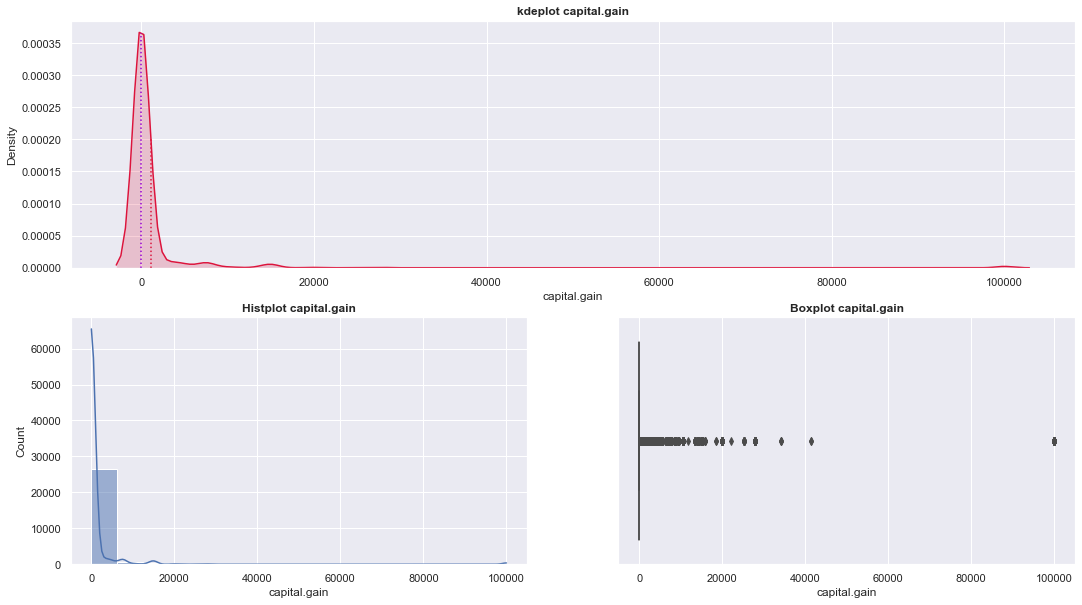

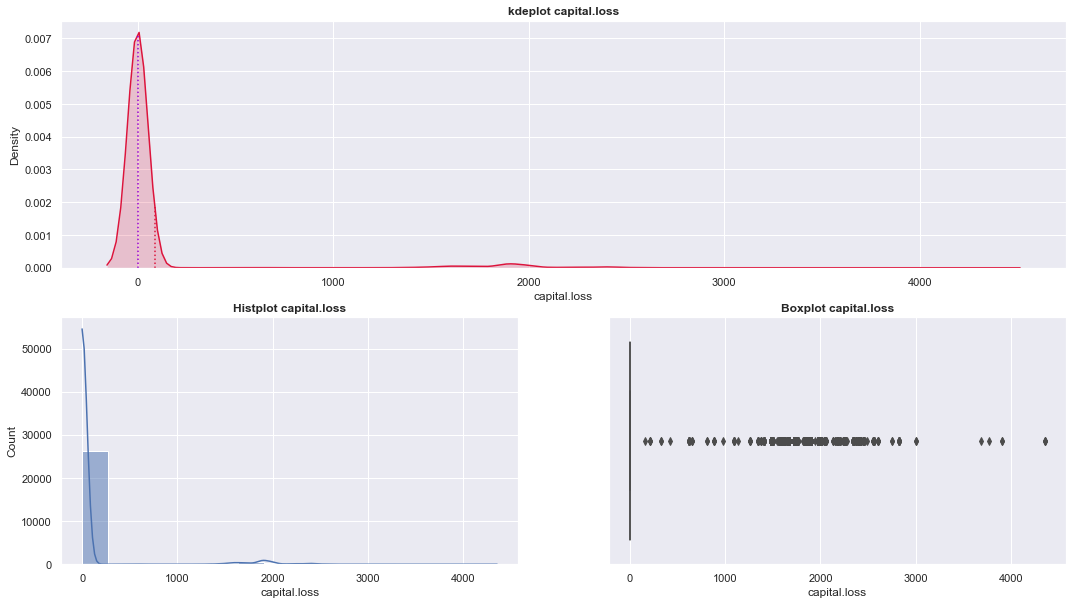

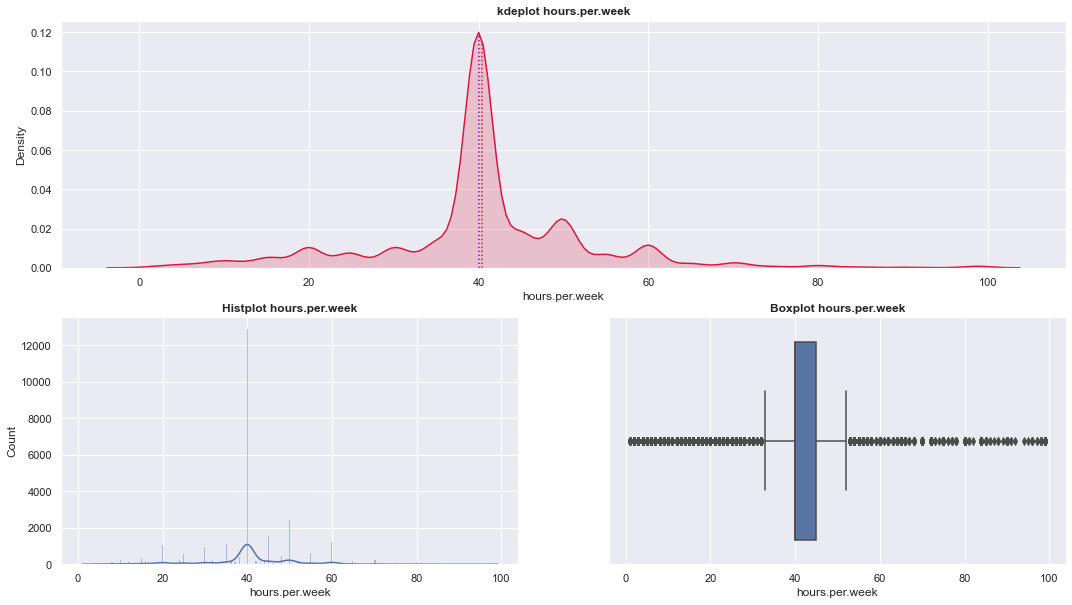

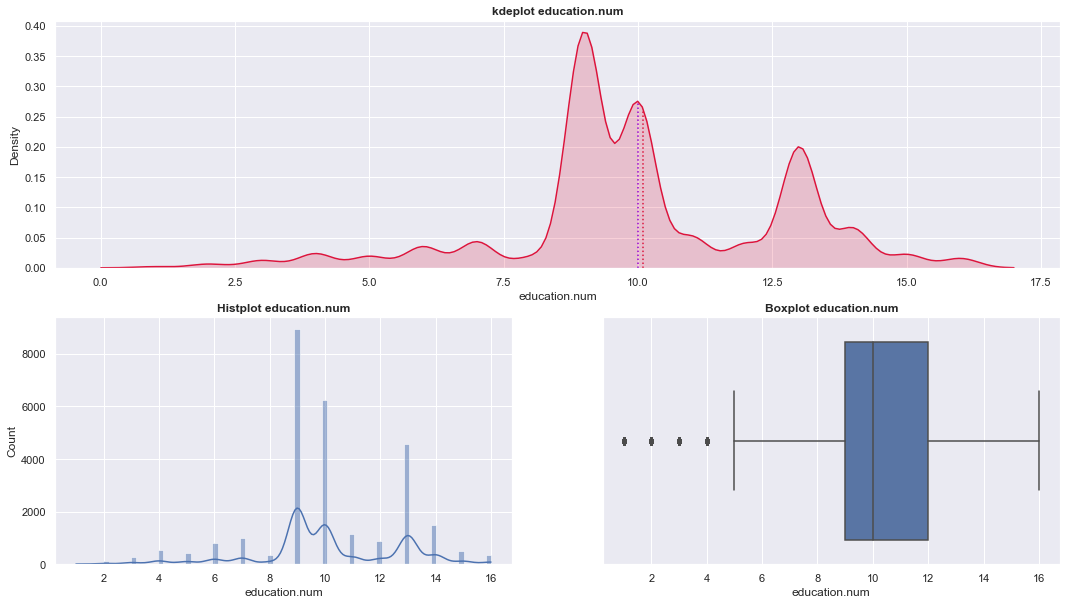

<Figure size 432x288 with 0 Axes>

In [187]:
graficar_distribucion_numericas(df, numerical_features)

#### Conclusiones de variables numéricas

Por lo general, la media suele estar influenciada por valores atípicos y la mediana suele ser una medida con mayor robustez. Vemos que los features age Y hours.per.week siguen una distribución más o menos normal.

Algunas cosas que vemos en los gráficos:

- En age se observa que mayoritariamente son personas alrededor de 36 años, y contiene outliers que podemos considerarlos a partir de los 70 años.
- capital.gain vemos con la mediana que el 50% son menores a 1000. Se visualiza facilmente los outliers.
- capital.loss vemos que son valores pequeños. Al igual que capital.gain, se visualizan fácilmente los outliers.
- En hours.per.week la cantidad de horas que trabajan las personas en general ronda las 40hs. Tambien se visualizan outliers.
- En education.enum se visualiza que la mayoria terminó la escuela secundaria.

# Target


En esta sección analizaremos la variable "income" del dataset, variable que representa el target de lo que queremos predecir a posteriori.

Comenzamos generando un gráfico de barras, para ver su distribución   

c:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


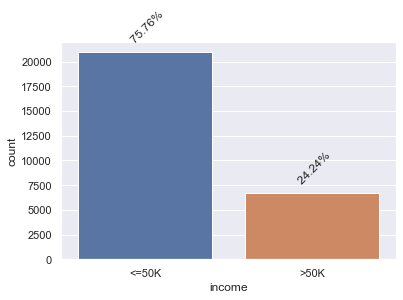

In [188]:
ncount=len(df)
ax = sns.countplot(df['income'])
#ax.bar_label(ax.containers[0])
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('   {:.2f}% '.format(100.*y/ncount), (x.mean(), y), 
        ha='center', va='bottom',rotation=45)
plt.show()

Viendo el gráfico, vemos que se trata de un dataset totalmente desbalanceado, porque hay mas entradas para una clase (<=50K) que para la otra.

Cantidad de entradas por clase

In [189]:
df.income.value_counts()

<=50K    20953
>50K      6703
Name: income, dtype: int64

Porcentajes de entradas por clase

In [190]:
df.income.value_counts(normalize=True)

<=50K    0.757629
>50K     0.242371
Name: income, dtype: float64

In [192]:
df['income'].value_counts(normalize=True) * 100

<=50K    75.762945
>50K     24.237055
Name: income, dtype: float64

Conclusión: debido a que el dataset está desbalanceado, se deberá tener en cuenta esto al momento de generar nuestros conjuntos de entrenamiento y de pruebas.

# Limpieza de Outliers


#### Limpieza de outliers en feature "age"

Para limpiar los outliers de edad utilizaremos el rango intercuartílico.

In [193]:
q75 , q25 = df['age'].quantile([0.75,0.25])

iqr = q75 - q25

min = df['age'].min()

max = round(q75 + (iqr*1.5), 0)

Edad Mínima y Máxima

In [194]:
print(f"Edad mínima: {min}")
print(f"Edad máxima: {int(max)}")

Edad mínima: 17
Edad máxima: 78


Cantidad de filas a eliminar

In [195]:
df[(df['age']<min) | (df['age']>max)].count()[1]

124

Porcentaje de outliers a eliminar respecto al total de filas del dataset

In [196]:
df[(df['age']<min) | (df['age']>max)].count()[1] * 100 / len(df)  # 0.44%

0.4483656349435927

Aplicamos filtro

In [197]:
mascara = (df['age']>=min)&(df['age']<=max)

In [198]:
df = df[mascara]

Cantidad de filas y columnas

In [199]:
print(f"Cantidad de filas: {df.shape[1]}")
print(f"Cantidad de columnas: {df.shape[0]}")

Cantidad de filas: 16
Cantidad de columnas: 27532


#### Limpieza de outliers en feature "hours.per.week"

Aplicamos una cota superior a la cantidad de horas trabajadas por semana. Decidimos que esta cota debe tomar el valor de 70 horas, ya que valores superiores son muy extraños.

Cantidad de filas a eliminar

In [200]:
df[~(df['hours.per.week']<= 70)].count()[1]

428

Porcentaje de filas a eliminar respecto al total

In [201]:
df[~(df['hours.per.week']<= 70)].count()[1] * 100 / len(df)  # 1.55%

1.5545546999854714

Aplicamos la máscara

In [202]:
mask = df['hours.per.week'] <= 70

In [204]:
df = df[mask] 

C:\Users\Asus\AppData\Local\Temp\ipykernel_19076\430032003.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[mask]


Cantidad de Filas y Columnas

In [205]:
print(f"Cantidad de filas: {df.shape[1]}")
print(f"Cantidad de columnas: {df.shape[0]}")

Cantidad de filas: 16
Cantidad de columnas: 27104


#### Graficamos nuevamente los features después de quitar los outliers

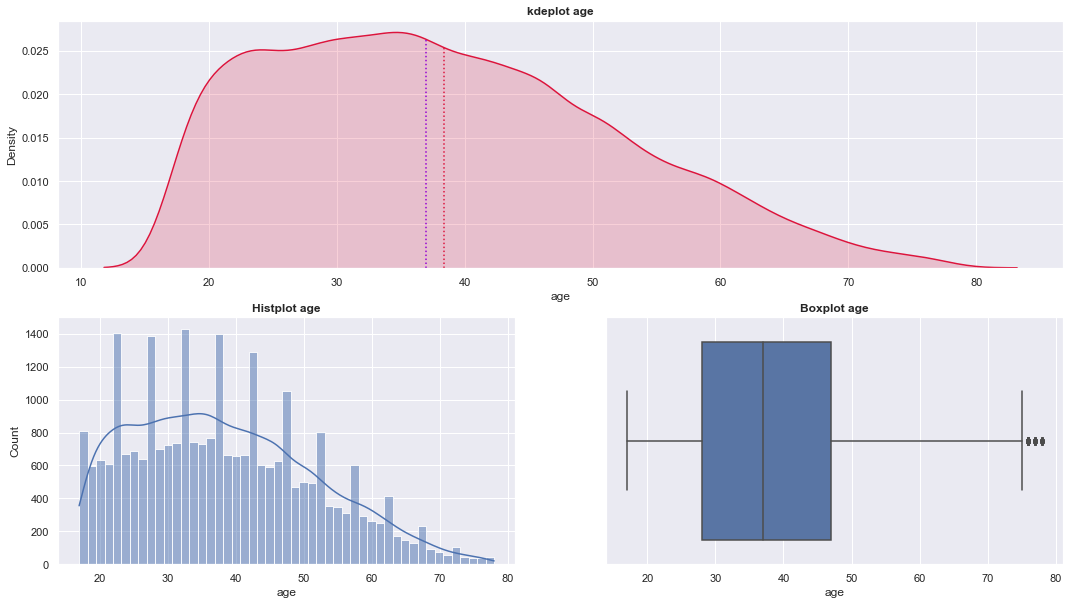

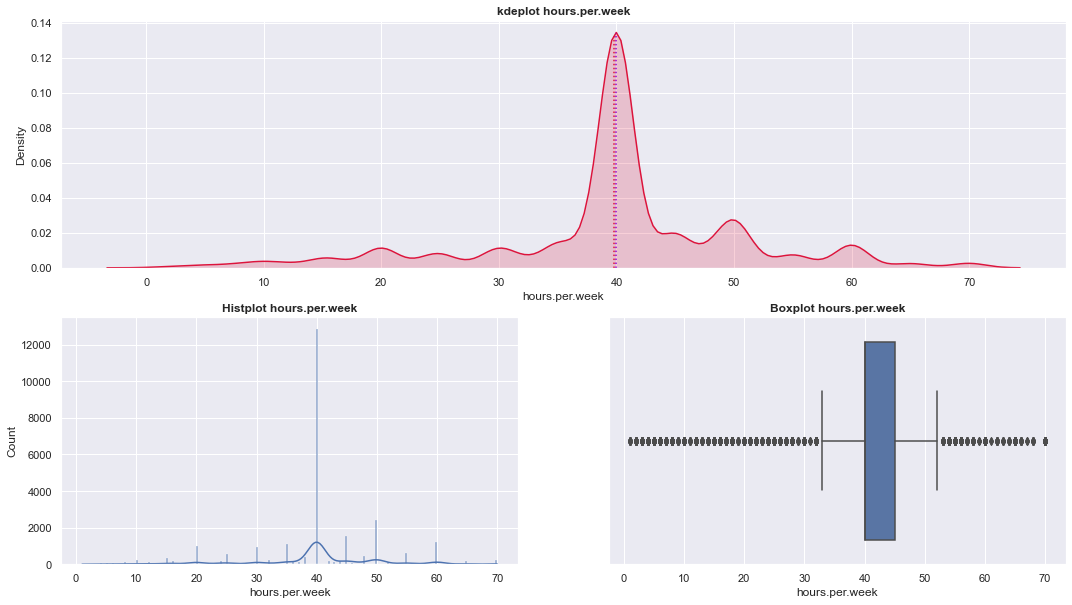

<Figure size 432x288 with 0 Axes>

In [206]:
numerical_features=["age","hours.per.week"]

graficar_distribucion_numericas(df, numerical_features)

Observamos que ahora los datos están más agrupados entre sí.

# Análisis de variables 

En esta sección generaremos distintos gráficos que muestran la relación entre los diferentes features y el target "income".

Definimos una función genérica para generar gráficos countplot

In [207]:
def graficar_distribucion_categoricas_target(df, categorical_features, target):
    ncount=len(df)
    
    for i, feature in enumerate(categorical_features):

        plt.figure(figsize=(20,4))
        
        ax=sns.countplot(data=df, x=feature,order=df[feature].value_counts().index, hue=target)
        ax.set_title(f'Countplot {feature}',fontdict={'fontsize': 12,'fontweight':'bold'})
        ax.tick_params(axis='x', rotation=45)
                       
        for p in ax.patches:
            x=p.get_bbox().get_points()[:,0]
            y=p.get_bbox().get_points()[1,1]
            ax.annotate('   {:.2f}% '.format(100.*y/ncount), (x.mean(), y), 
                ha='center', va='bottom',rotation=45)
        
        plt.xticks(rotation=90)
        plt.show()

Graficamos countplots que relaciona features categóricos con el target

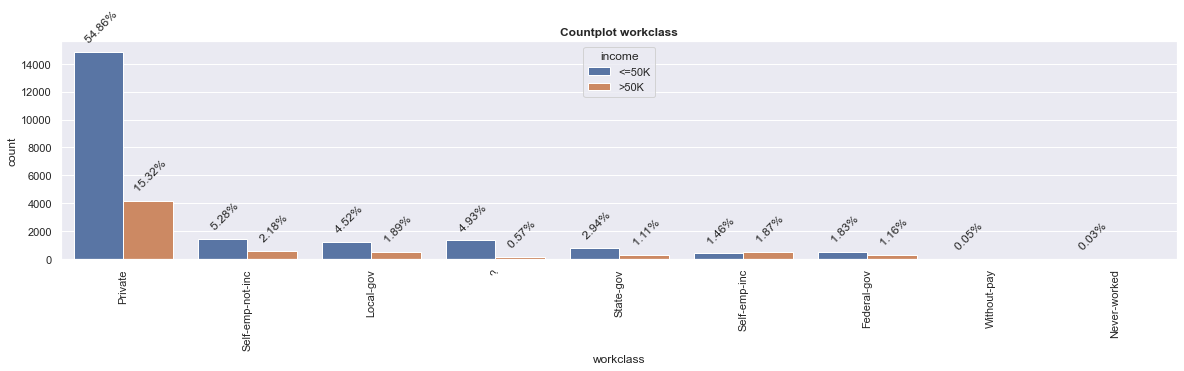

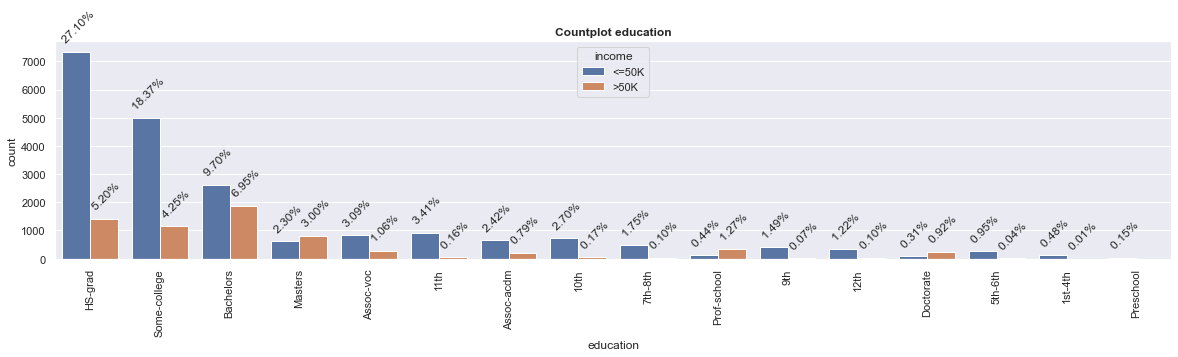

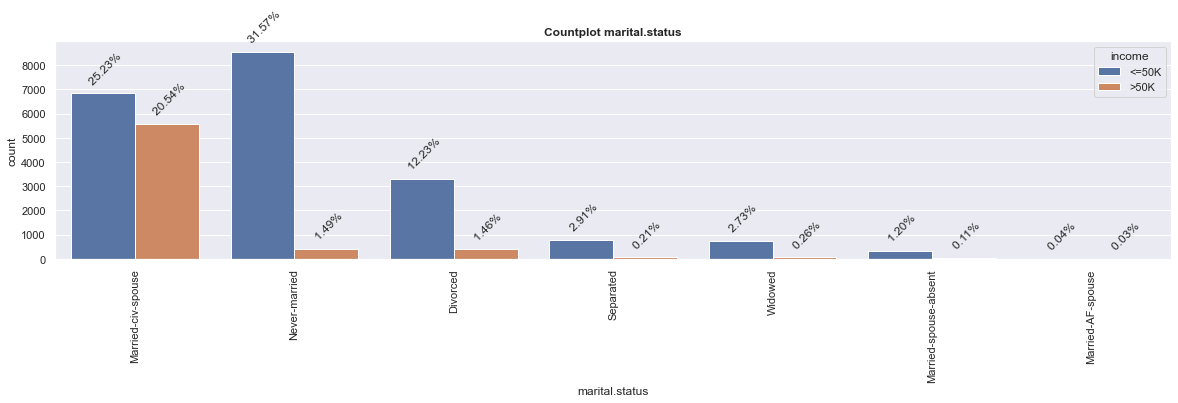

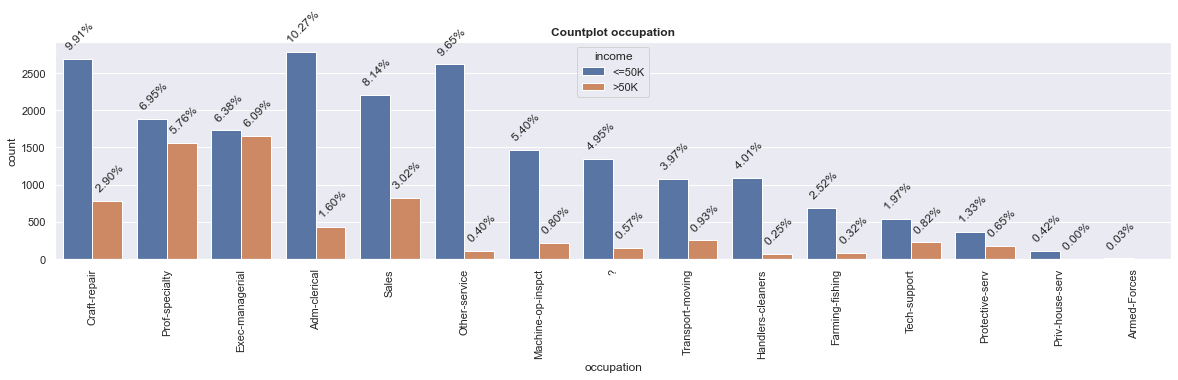

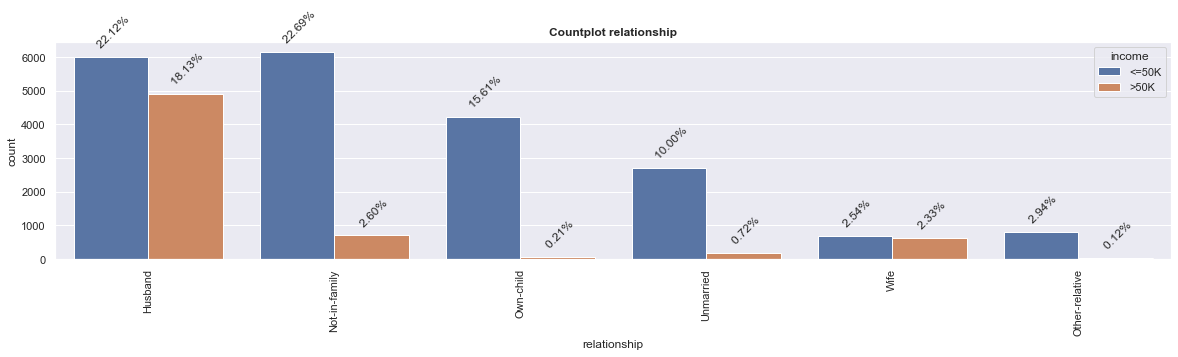

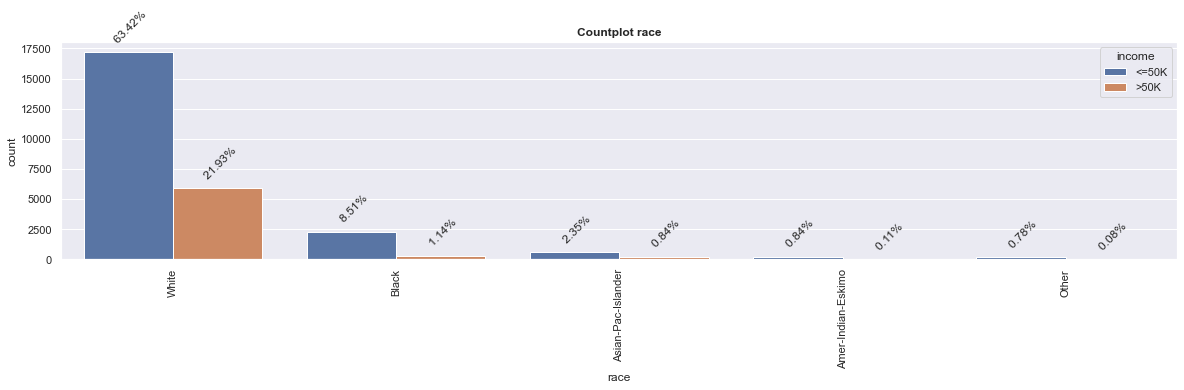

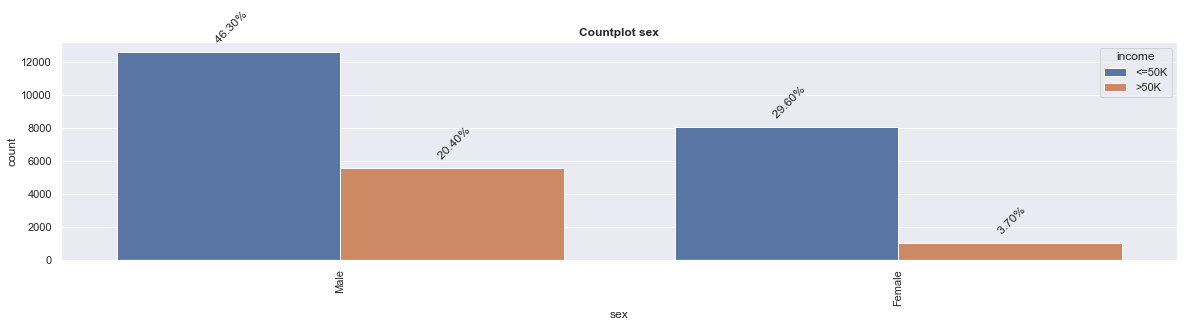

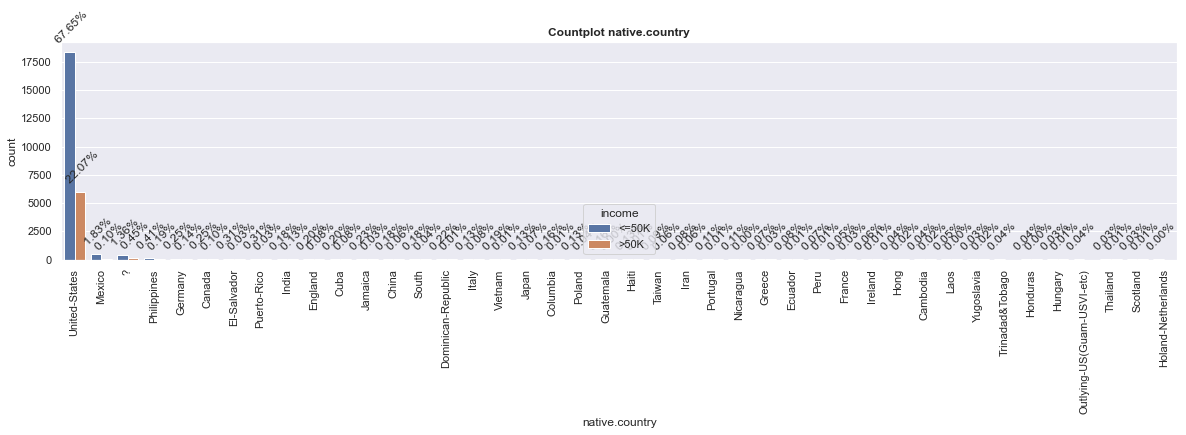

In [208]:
categorical_features = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex',  'native.country']

target= "income"

graficar_distribucion_categoricas_target(df, categorical_features,target)

Ahora graficaremos un catplot que relaciona el feature "education" con el feature "age" y el target "income".

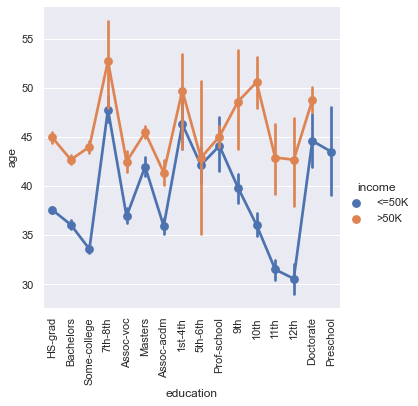

In [209]:
sns.catplot(x="education",y="age",data=df,kind="point", hue="income",split=True)
plt.xticks(rotation=90)   
plt.show()

Observamos claramente que aquellas personas con mayor nivel educativo y con edad arriba de los 40 años son los que poseen ingresos anuales mayores a 50K

#### Conclusiones sobre variables y target

- En workclase vemos que un 15% del total de dataset trabajan en el ambito privado y superan los 50k.
- En education vemos que hay un 7% del total que gana mas 50K y son licenciados.
- En marital.status vemos que hay un 20.55% del total que gana más 50K y son casados.
- En occupation vemos que la mayor cantidad de personas pertenecen a los rubros graft-repair.
- En prof-speciality y exec-managerial y el 14.76% supera los 50K.
- relationship como vimos el dataset esta desbalanceado, se visualiza que los esposos predominan.
- En race predomina la raza blanca y son los que más ingresos anuales tienen.
- En sex vemos que predomina el sexo masculino, lo cual tiene sentido con lo que nos dice la variable relationship, donde la mayoría son esposos. Es por esto que vemos que el sexo masculino es el que más ingresos anuales posee.


# Correlaciones entre Variables

En esta sección vamos a ver las correlaciones entre nuestros features, para lo cual generaremos un pairplot, relplot y la matriz de correlación.

Dropeamos variables que no interesan

In [210]:
# Eliminamos variables que no nos interesan.
df.drop(['index','ID'], axis=1, inplace=True)

Gráfico de referencia para ver correlaciones entre variables

<img src="https://www.maximaformacion.es/wp-content/uploads/2021/07/Que-es-la-correlacion_valores-del-coeficiente.png" width="700px">

Graficamos correlación entre variables con pairplot

<Figure size 1440x1440 with 0 Axes>

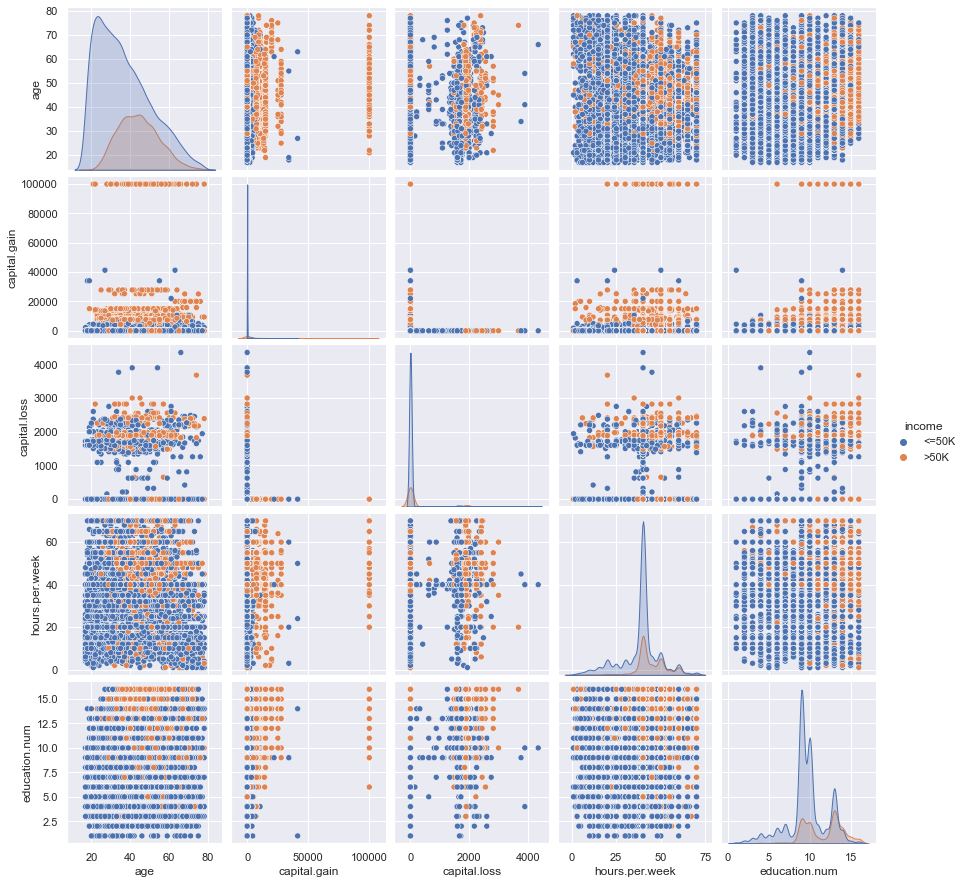

In [211]:
# Correlaciones entre variables numericas
plt.figure(figsize=(20,20))
sns.pairplot(df[['age', 'capital.gain', 'capital.loss', 'hours.per.week', 'education.num','income']], hue = 'income')

#### Correlación entre Nivel de Educación, Edad y Sexo

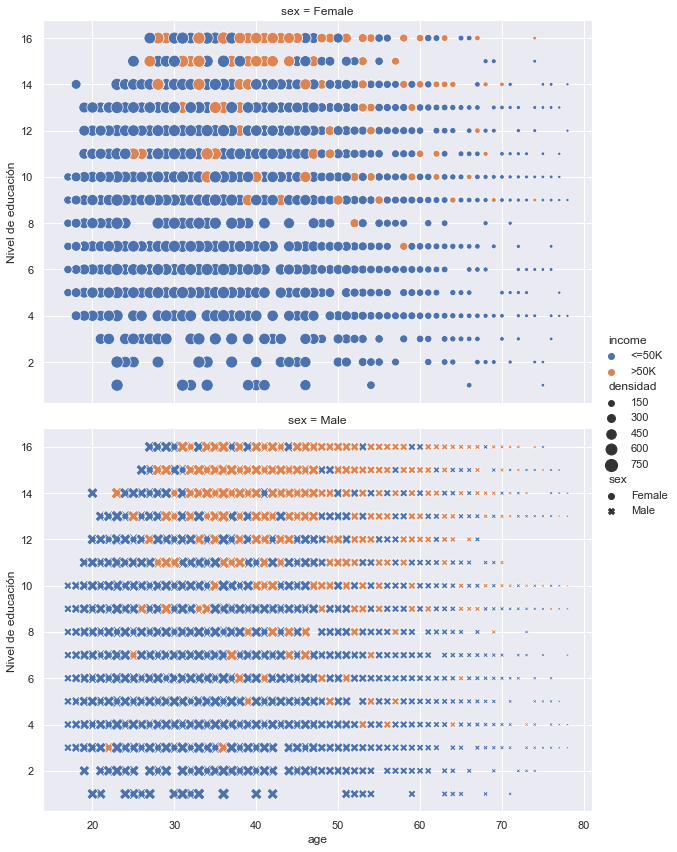

In [212]:
df_copy = df.copy()
df_copy['densidad']=df_copy['age'].replace(to_replace=(np.sort(df_copy['age'].unique())),value=(np.array( df_copy.groupby('age').agg({'age':'count'}) )))

plot=sns.relplot(data=df_copy,
           x="age",
           #y="hours.per.week",
           y="education.num",
           kind="scatter",
           hue="income",
           row="sex",  
           size="densidad", 
           sizes=(10,150),  
           style="sex",height=6,aspect=11.7/8.27)
plot.set_ylabels("Nivel de educación")


#### Convertirmos target de categórico a numérico

In [213]:
map_income = {'<=50K':0,
            '>50K':1}

df['income'] = df['income'].replace(map_income)

#### Matriz de Correlación

<AxesSubplot:>

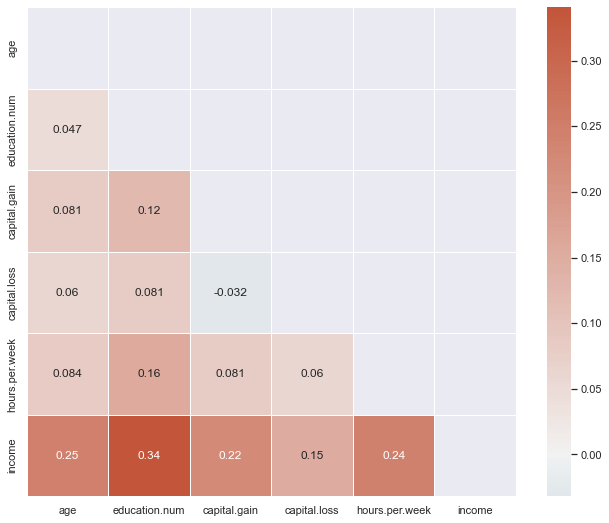

In [214]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df.corr(), mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, annot=True)

Conclusiones: las variables tienen muy poca correlación. Nuestra intuición era que a mayor edad mayor ingresos pero esto no se ve reflejado en la matriz de correlación. Sin embargo, las correlaciones más fuertes están entre nivel educativo e ingresos, edad e ingresos y horas por semana e ingresos, lo cual tiene sentido.

#### Correlación entre "education.num", "capital.gain" y "income"

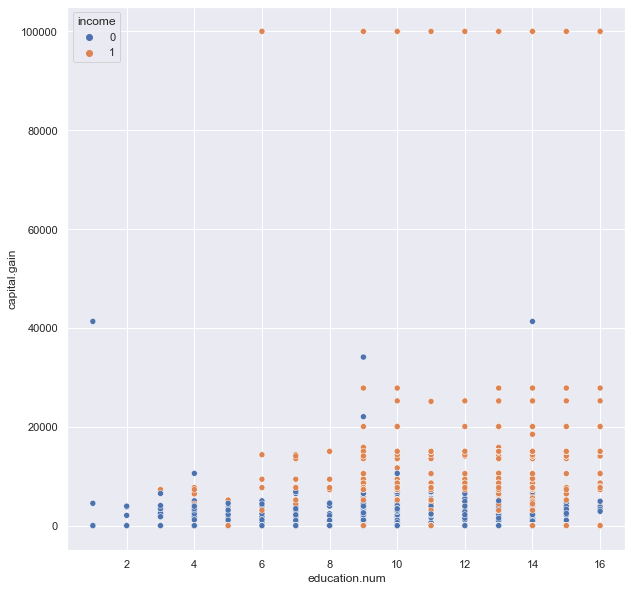

In [215]:
# Scatter plot para ver correlacion grafica entre variables
sns.set(style="darkgrid")
fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(x='education.num', y='capital.gain', data=df, hue='income')
plt.show()

Vemos que, en general, cuando mayor es el nivel educativo de una persona, mayor son los ingresos de los mismos.

# Separación de datos: Train Test Split

En esta sección lo que se hará es generar un conjunto de entrenamiento y un conjunto de evaluación a partir de los datos del archivo "train.csv" para poder entrenar y evaluar nuestros modelos a posteriori.

In [139]:
from sklearn.model_selection import train_test_split

Cargamos el archivo

In [388]:
df = pd.read_csv('CSV/train.csv')

Dropeamos columnas que no son de relevancia para el modelo

In [389]:
df.drop(['index','ID','education'], axis=1, inplace=True)

Separamos los features de nuestro target

In [390]:
X = df.drop(['income'], axis=1).copy()
y = df['income'].copy()

Seteamos nuestros conjuntos de entrenamiento y pruebas. Debido a que el dataset está desbalanceado, debemos usar el hiperparámetro stratify=y

In [391]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

Vemos la cantidad de filas en cada conjunto

In [392]:
conjuntos = {"X_train": X_train, "X_test": X_test, "y_train": y_train, "y_test": y_test}
for key, value in conjuntos.items():
    print(f"{key}: {len(value)} filas")

X_train: 22124 filas
X_test: 5532 filas
y_train: 22124 filas
y_test: 5532 filas


# Preprocessing

En esta sección aplicaremos transformaciones sobre los datos. En primera instancia, los modelos a utilizar en el siguiente apartado necesitan que los datos categóricos sean convertidos a numéricos. 

Para ello, el primer preprocesamiento que aplicaremos sobre los datos sera un OneHotEncoder.

El preprocesamiento lo hacemos sobre el set de train y luego lo aplicamos al de test antes de generar las predicciones.

In [143]:
from sklearn.preprocessing import OneHotEncoder

In [393]:
def aplicar_OneHotEncoder(X_train, X_test, categorical):
    ohe = OneHotEncoder(sparse=False).fit(X_train[categorical])

    # Train

    encoded = ohe.transform(X_train[categorical])
    encoded_df = pd.DataFrame(
                        columns= ohe.get_feature_names(),
                        data= encoded,
                        index= X_train.index)

    X_train = pd.concat([X_train, encoded_df], axis='columns')

    # Test

    encoded = ohe.transform(X_test[categorical])
    encoded_df = pd.DataFrame(
                        columns= ohe.get_feature_names(),
                        data= encoded,
                        index= X_test.index)

    X_test = pd.concat([X_test, encoded_df], axis='columns')
    
    return X_train, X_test, ohe

Aplicamos OneHotEncoder a X_train y X_test

In [394]:
categorical = ['workclass', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']

X_train, X_test, ohe = aplicar_OneHotEncoder(X_train, X_test, categorical)

c:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
c:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Eliminamos columnas que ya no necesitamos, porque las resolvió el OneHotEncoder

In [395]:
X_train = X_train.drop(categorical, axis=1)
X_test = X_test.drop(categorical, axis=1)

Convertimos nuestro target categórico a numérico (0,1)

In [396]:
# Replace
reglas = {'<=50K':0, '>50K':1}
            
y_train = y_train.map(reglas)
y_test = y_test.map(reglas)

Ahora hacemos una copia de X_train y X_test para usarlo más adelante

In [397]:
X_train_copy = X_train.copy()
X_test_copy = X_test.copy()

# Modelos

En esta sección vamos a construir los modelos que permitan realizar las predicciones sobre personas para determinar si obtendrán un ingreso anual mayor a 50K o no.

Se trata de un problema de clasificación ya que lo que tenemos que hacer es predecir si una persona va a tener un ingreso anual mayor a 50K o no, es decir, pertenece a una clase o a otra, a partir de los datos de entrada. Por esta razón se usarán algoritmos supervisados de clasificación.

Vamos a utilizar los siguientes modelos de clasificación para realizar las predicciones del ejercicio:
- Baseline
- DecisionTreeClassifier
- KNN
- RandomForest

Se utilizará GridSearch para encontrar los mejores hiperparámetros para cada modelo.

# Modelo 1: Baseline

Al tener un dataset desbalanceado, el modelo más simple que se puede aplicar es aquel que prediga siempre la clase más representativa. Esto se conoce como Modelo Baseline o Modelo Base y nos sirve justamente como base para construir modelos más complejos que ofrezcan mejores métricas.

In [339]:
def baseline_prediction(X):
    y_pred = []
    for i in range(len(X)):
        y_pred.append(0)
    return y_pred

El modelo que desarrollemos, tiene que ser mejor que este baseline. ¿ Qué accuracy_score tiene el baseline ?

In [340]:
from sklearn.metrics import accuracy_score

reglas = {'<=50K':0, '>50K':1}
y_copy = y
y_copy = y_copy.map(reglas)

y_pred = baseline_prediction(X)

accuracy = accuracy_score(y_copy,y_pred)

print(accuracy)

0.7576294474978305


El accuracy obtenido se corresponde con el porcentaje de la clase "<=50K" respecto al total.

Ahora, calculamos las tres métricas más importantes: precision, recall y F1-score.

In [341]:
from sklearn.metrics import classification_report
print(classification_report(y_copy, y_pred))

              precision    recall  f1-score   support

           0       0.76      1.00      0.86     20953
           1       0.00      0.00      0.00      6703

    accuracy                           0.76     27656
   macro avg       0.38      0.50      0.43     27656
weighted avg       0.57      0.76      0.65     27656



c:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


A partir de estas métricas, vemos que el modelo baseline predice todo como clase "<=50K".

Debemos construir modelos que mejoren estas métricas para asi mejorar la predicción de la pertenencia a una clase o a otra.

# Modelo 2: DecisionTreeClassifier

"The decision tree classifier (Pang-Ning et al., 2006) creates the classification model by building a decision tree. Each node in the tree specifies a test on an attribute, each branch descending from that node corresponds to one of the possible values for that attribute."

In [229]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

### Performance según Profundidad

Probamos la perfomance de este modelo para distintos valores de profundidad

In [230]:
#defino las listas de los accuracy scores
lista_accuracy_train = []
lista_accuracy_test = []

#defino lista para el nro de vecinos
profundidad = [1,2,3,4,5,6,7,8]

for p in profundidad:

    tree = DecisionTreeClassifier(max_depth=p)
    tree.fit(X_train, y_train)
    
    #obtengo predicciones
    y_train_pred = tree.predict(X_train)
    y_test_pred = tree.predict(X_test)
    
    #accuracy test
    
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    
    #guardo los valores de accuracy
    lista_accuracy_train.append(train_acc)
    lista_accuracy_test.append(test_acc)

Mostramos en forma de tabla los valores de accuracy para train y para test, siendo la primer fila correspondiente al accuracy sobre train y la segunda sobre test.

In [231]:
from tabulate import tabulate
print(tabulate([lista_accuracy_train, lista_accuracy_test],headers=['k=1', 'k=2', 'k=3', 'k=4', 'k=5','k=6','k=7','k=8']))

     k=1       k=2       k=3       k=4       k=5       k=6       k=7       k=8
--------  --------  --------  --------  --------  --------  --------  --------
0.757639  0.827382  0.84275   0.843247  0.852378  0.855225  0.857982  0.8597
0.757592  0.828091  0.843456  0.843637  0.852856  0.854664  0.854302  0.854121


Graficamos el accuracy obtenido por cada modelo respecto a la profundidad

Text(0.5, 1.0, 'DecisionTreeClassifier Performance')

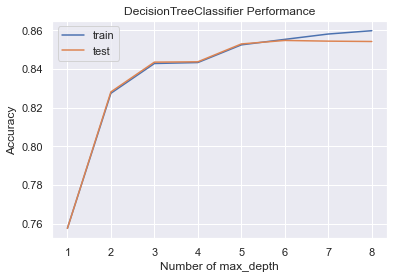

In [232]:
plt.plot(profundidad, lista_accuracy_train, label = 'train')
plt.plot(profundidad, lista_accuracy_test, label = 'test')
plt.legend()
plt.xlabel('Number of max_depth')
plt.ylabel('Accuracy')
plt.title("DecisionTreeClassifier Performance")

A partir de una profundidad de 6 comienzan a diverger. Según nuestro criterio, esta sería la mejor profundidad para el modelo.

### Gridsearch sobre DecisionTreeClassifier

A través de GridSearch buscaremos cuales son los mejores hiperparámetros para el modelo.

In [233]:
from sklearn.model_selection import GridSearchCV

In [234]:
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [1,2,3,4,5, 6, 7, 8, 9,10,11,12,13,14,15,16,17,18,19,20],
              'criterion' :['gini', 'entropy']
             }
tree_class = DecisionTreeClassifier(random_state=1024)
grid_search = GridSearchCV(estimator=tree_class, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
print(grid_search.best_score_)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits
{'ccp_alpha': 0.001, 'criterion': 'entropy', 'max_depth': 14, 'max_features': 'auto'}
0.8292356228481523


Vemos que el mejor modelo es aquel que tiene:
- 'ccp_alpha': 0.001, 
- 'criterion': 'entropy'
- 'max_depth': 14
- 'max_features': 'auto'

Y el accuracy obtenido es 0.83

### Aplicando los mejores hiperparámetros al modelo

Instanciamos el árbol con los hiperparámetros que nos devolvió el gridsearch.

In [398]:
from sklearn import tree

arbol_de_decision = tree.DecisionTreeClassifier(
        max_depth=14,
        ccp_alpha=0.001,
        criterion='entropy',
        max_features='auto',
        random_state=1234
)

arbol = arbol_de_decision.fit(X_train, y_train)


Predecimos

In [399]:
y_train_pred = arbol.predict(X_train)
y_test_pred = arbol.predict(X_test)

Evaluamos

In [349]:
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print('Porcentaje de aciertos sobre el set de entrenamiento:', train_acc)
print('Porcentaje de aciertos sobre el set de evaluación:',test_acc)

Porcentaje de aciertos sobre el set de entrenamiento: 0.8436087506779968
Porcentaje de aciertos sobre el set de evaluación: 0.8461677512653651


Graficamos la matriz de confusión

c:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


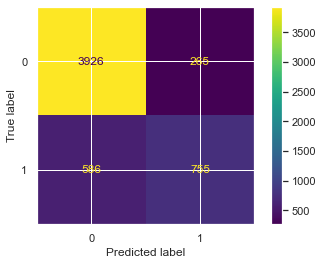

In [350]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(arbol, X_test, y_test)

Vemos que el total de TP es de 3926 y el total de TN es de 755.

Calculamos métricas

In [351]:
from sklearn.metrics import classification_report
print("____ Train ____")
print(classification_report(y_train, y_train_pred))
print("____ Test ____")
print(classification_report(y_test, y_test_pred))

____ Train ____
              precision    recall  f1-score   support

           0       0.87      0.93      0.90     16762
           1       0.73      0.56      0.64      5362

    accuracy                           0.84     22124
   macro avg       0.80      0.75      0.77     22124
weighted avg       0.84      0.84      0.84     22124

____ Test ____
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      4191
           1       0.74      0.56      0.64      1341

    accuracy                           0.85      5532
   macro avg       0.81      0.75      0.77      5532
weighted avg       0.84      0.85      0.84      5532



Como conclusión, vemos que las métricas de entrenamiento y de evaluación son casi semejantes.

Calculamos ROC AUC score

In [352]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
auc = round(roc_auc_score(y_test, y_test_pred), 4)
print(f"ROC AUC score = {auc}")

ROC AUC score = 0.7499


Graficamos la Curva ROC

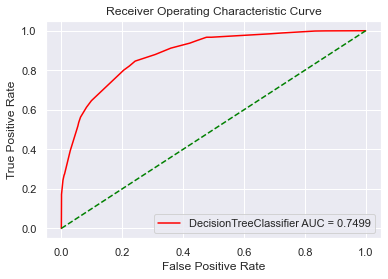

In [353]:
prob = arbol.predict_proba(X_test)
prob = prob[:, 1]
fper, tper, thresholds = roc_curve(y_test, prob)
plt.plot(fper, tper, color='red', label=f'DecisionTreeClassifier AUC = {auc}')
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend()

#### Features más importantes para el modelo

Obtenemos las features importantes

In [402]:
fi = pd.DataFrame(columns=["FEATURE", "IMPORTANCE"])
fi["FEATURE"] = X_train.columns
fi["IMPORTANCE"] = arbol.feature_importances_
fi = fi.sort_values("IMPORTANCE", ascending=False)

Graficamos

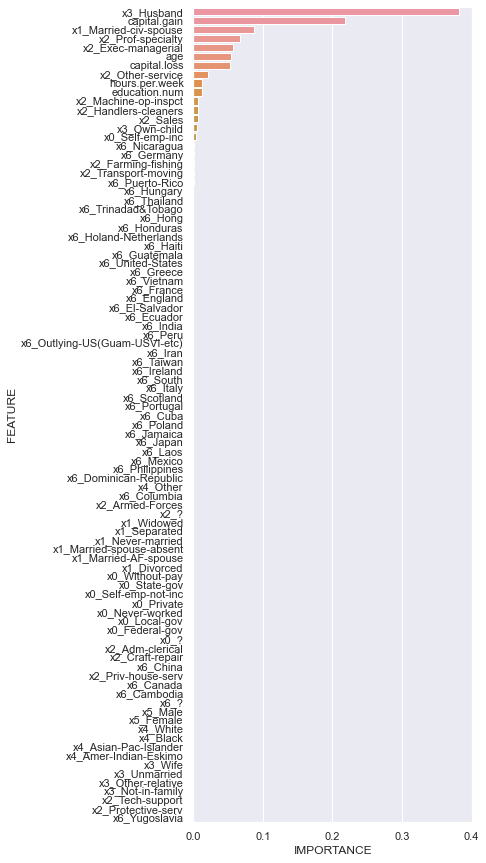

In [403]:
plt.figure(figsize=(5, 15))
sns.barplot(y=fi.FEATURE, x=fi.IMPORTANCE)
plt.show()

Se observa con claridad que el modelo considera como importantes las 13 primeras features, ya que el resto no aporta nada al modelo. En consecuencia, dichas features que no aportan nada se pueden eliminar del modelo.

Es llamativo que el feature más representante sea x3_Husband, ya que lo más lógico sería que fuera el capital.gain.

### Estructura del DecisionTreeClasifier

A continuación mostramos la estructura de nodos creados por el DecisionTreeClassifier

In [354]:
print(tree.export_text(arbol,feature_names=list(X_train.columns.values)))

|--- x3_Husband <= 0.50
|   |--- x2_Machine-op-inspct <= 0.50
|   |   |--- x2_Exec-managerial <= 0.50
|   |   |   |--- x2_Handlers-cleaners <= 0.50
|   |   |   |   |--- x2_Other-service <= 0.50
|   |   |   |   |   |--- x2_Prof-specialty <= 0.50
|   |   |   |   |   |   |--- capital.gain <= 7073.50
|   |   |   |   |   |   |   |--- age <= 24.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- age >  24.50
|   |   |   |   |   |   |   |   |--- hours.per.week <= 41.50
|   |   |   |   |   |   |   |   |   |--- x1_Married-civ-spouse <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- x1_Married-civ-spouse >  0.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- hours.per.week >  41.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- capital.gain >  7073.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- x2_Prof-specialty >  0

### Prediciendo sobre test.csv

Levantamos el archivo

In [355]:
df_test = pd.read_csv("CSV/test.csv")
df_test.head(1)

,index,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,ID
0,3643,53,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,3137,0,40,United-States,3643


Dropeamos columnas que no son de interés

In [356]:
df_test.drop(columns=['index','education','ID'], inplace=True)

Aplicamos OneHotEncoder

In [357]:
categorical = ['workclass', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']

encoded = ohe.transform(df_test[categorical])
encoded_df = pd.DataFrame(
                    columns= ohe.get_feature_names(),
                    data= encoded,
                    index= df_test.index)

df_test = pd.concat([df_test, encoded_df], axis='columns')

df_test = df_test.drop(categorical, axis=1)

c:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Predecimos

In [358]:
y_test_pred_prod = arbol.predict(df_test)

Levantamos el archivo submit_example.csv

In [359]:
df_submit = pd.read_csv("CSV/submit_example.csv")

Agregamos las predicciones al dataframe

In [360]:
df_submit['PRED'] = y_test_pred_prod

Creamos el archivo

In [361]:
df_submit.to_csv('submit_example_tree.csv', sep=',', encoding='utf-8')

De un total de 4881, encontró 879 personas con ingresos mayor a 50K

# Modelo 3: K-Neighbours-Classifier

El algoritmo de k vecinos más cercanos, también conocido como KNN o k-NN, es un clasificador de aprendizaje supervisado no paramétrico, que utiliza la proximidad para hacer clasificaciones o predicciones sobre la agrupación de un punto de datos individual. Si bien se puede usar para problemas de regresión o clasificación, generalmente se usa como un algoritmo de clasificación, partiendo de la suposición de que se pueden encontrar puntos similares cerca uno del otro.
[https://www.ibm.com/ar-es/topics/knn]


A continuación vamos a realizar lo mismo que hicimos en la sección anterior pero utilizando el K-Neighbours-Classifier.

### Preprocesamiento

Este algoritmo necesita como preprocesamiento extra que las variables numéricas estén transformadas en una misma escala, para lo cual se va a utilizar MinMaxScaler ya que los datos no están distribuidos de forma normal y por eso no se puede aplicar StandarScaler.

El OneHotEncoder ya fue aplicado en la sección de split de nuestros conjuntos de entrenamiento y prueba.

Creamos función genérica para aplicar MinMaxScaler

In [243]:
from sklearn.preprocessing import MinMaxScaler

In [404]:
def aplicar_MinMaxScaler(X_train, X_test, features):
    
    # Creamos una instancia
    scaler = MinMaxScaler()
    
    # Entrenamos
    scaler.fit(X_train[features])

    # Transformamos
    X_train[features] = scaler.transform(X_train[features])

    X_test[features] = scaler.transform(X_test[features])
    
    return X_train, X_test, scaler

Aplicamos MinMaxScaler

In [405]:
numerical_features = ['age', 'capital.gain', 'capital.loss', 'hours.per.week', 'education.num']

X_train, X_test, scaler = aplicar_MinMaxScaler(X_train, X_test, numerical_features)

### Performance según Vecinos

A continuación mostraremos la performance del modelo KNN alternando su hiperparámetro n_neighbors de 1 a 10, viendo como varían sus métricas.

In [104]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [105]:
# defino las listas de los accuracy scores
lista_accuracy_train = []
lista_accuracy_test = []

# defino lista para el nro de vecinos
vecinos = [1,2,3,4,5,6,7,8,9,10]

for k in vecinos:

    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # obtengo predicciones
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)
    
    # accuracy test
    
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    
    # guardo los valores de accuracy
    lista_accuracy_train.append(train_acc)
    lista_accuracy_test.append(test_acc)

Vemos el accuracy para train y para test en forma tabular, siendo la primer fila el accuracy de train y la segunda la de test.

In [106]:
print(tabulate([lista_accuracy_train, lista_accuracy_test],headers=['k=1', 'k=2', 'k=3', 'k=4', 'k=5','k=6','k=7','k=8','k=9','k=10']))

     k=1       k=2       k=3       k=4       k=5       k=6       k=7       k=8       k=9      k=10
--------  --------  --------  --------  --------  --------  --------  --------  --------  --------
0.97731   0.889622  0.892289  0.872446  0.87335   0.864762  0.863813  0.856671  0.858118  0.854909
0.800976  0.812364  0.824657  0.822668  0.825922  0.830983  0.831887  0.834779  0.83966   0.840564


Graficamos el accuracy obtenido por cada modelo respecto a la cantidad de Vecinos

Text(0.5, 1.0, 'KNN Performance')

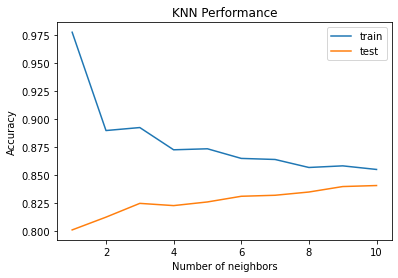

In [107]:
plt.plot(vecinos, lista_accuracy_train, label = 'train')
plt.plot(vecinos, lista_accuracy_test, label = 'test')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.title("KNN Performance")

Estamos buscando un patrón en el que el rendimiento en el conjunto de prueba mejore y luego comience a empeorar, y el rendimiento en el conjunto de entrenamiento continúe mejorando.


Parece ser que K=10 es el mejor. Para asegurarnos, a continuación utilizaremos el GridSearch.

### GridSearch sobre KNN

Aplicamos GridSearchCV sobre KNN Classifier para ver cuáles son los mejores hiperparámetros.

In [108]:
knn = KNeighborsClassifier()

k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False, verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(X_train, y_train)

print(grid_search.best_params_)
print(grid_search.best_score_)

Fitting 10 folds for each of 30 candidates, totalling 300 fits
{'n_neighbors': 21}
0.8338012721147192


El mejor valor para el hiperparámetro n_neighbors es 21.

Vemos que nos arroja un accuracy de 0.83.


### KNN con los datos de GridSearch

A continuación generaremos un KNN Classifier con un n_neighbors = 21

In [406]:
#Preparo el modelo con K=5
knn = KNeighborsClassifier(n_neighbors=21)
knn.fit(X_train, y_train)

#Realizo las predicciones con los conjuntos de test
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

#Evalúo su accuracy
train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)

print('Porcentaje de aciertos sobre el set de entrenamiento:',train_acc)
print('Porcentaje de aciertos sobre el set de evaluación:',test_acc)

Porcentaje de aciertos sobre el set de entrenamiento: 0.8475863315856084
Porcentaje de aciertos sobre el set de evaluación: 0.8434562545191613


Matríz de Confusión

c:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


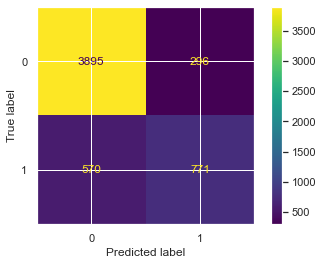

In [365]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

confusion_matrix(y_test, y_pred_test)

plot_confusion_matrix(knn, X_test, y_test)
plt.show()

Vemos que el total de TP es 3895 y el total de TN es 771

Métricas del modelo

In [366]:
from sklearn.metrics import classification_report

print("____ Train ____")
print(classification_report(y_train, y_pred_train))
print("____ Test ____")
print(classification_report(y_test, y_pred_test))

____ Train ____
              precision    recall  f1-score   support

           0       0.88      0.93      0.90     16762
           1       0.73      0.59      0.65      5362

    accuracy                           0.85     22124
   macro avg       0.80      0.76      0.78     22124
weighted avg       0.84      0.85      0.84     22124

____ Test ____
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      4191
           1       0.72      0.57      0.64      1341

    accuracy                           0.84      5532
   macro avg       0.80      0.75      0.77      5532
weighted avg       0.84      0.84      0.84      5532



Vemos que las métricas para train y para test están muy cercanas entre sí.

Calculamos ROC AUC score

In [367]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
auc = round(roc_auc_score(y_test, y_pred_test), 4)
print(f"ROC AUC score = {auc}")

ROC AUC score = 0.7522


Graficamos la Curva ROC

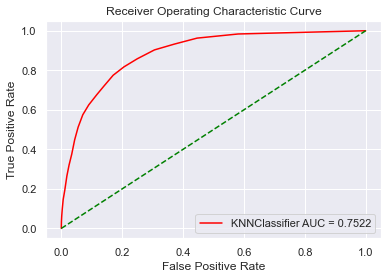

In [368]:
prob = knn.predict_proba(X_test)
prob = prob[:, 1]
fper, tper, thresholds = roc_curve(y_test, prob)
plt.plot(fper, tper, color='red', label=f'KNNClassifier AUC = {auc}')
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend()

Features más importantes para el modelo

In [ ]:
from sklearn.inspection import permutation_importance
# perform permutation importance
results = permutation_importance(knn, X_train, y_train, scoring='accuracy')
# get importance
importance = results.importances_mean
importance=np.sort(importance)
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: {}  Score: {}' .format(i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))] ,importance)
plt.show()

### Aplicamos sobre test.csv

Levantamos el archivo

In [369]:
df_test = pd.read_csv("CSV/test.csv")
df_test.drop(columns=['index','education','ID'], inplace=True)

Aplicamos OneHotEncoder

In [370]:
categorical = ['workclass', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']

encoded = ohe.transform(df_test[categorical])
encoded_df = pd.DataFrame(
                    columns= ohe.get_feature_names(),
                    data= encoded,
                    index= df_test.index)

df_test = pd.concat([df_test, encoded_df], axis='columns')

df_test = df_test.drop(categorical, axis=1)

c:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Aplicamos MinMaxScaler

In [371]:
numerical_features = ['age', 'capital.gain', 'capital.loss', 'hours.per.week', 'education.num']

df_test[numerical_features] = scaler.transform(df_test[numerical_features])

Predecimos

In [372]:
y_test_pred_prod = knn.predict(df_test)

Generamos el archivo resultado

In [373]:
df_submit = pd.read_csv("CSV/submit_example.csv")

df_submit['PRED'] = y_test_pred_prod

df_submit.to_csv('submit_example_knn.csv', sep=',', encoding='utf-8')

Se encontraron 903 personas con income > 50K de un total de 4881.

# Modelo 4: RandomForestClassifier

The Random forest or Random Decision Forest is a supervised Machine learning algorithm used for classification, regression, and other tasks using decision trees.
The Random forest classifier creates a set of decision trees from a randomly selected subset of the training set. It is basically a set of decision trees (DT) from a randomly selected subset of the training set and then It collects the votes from different decision trees to decide the final prediction. [https://www.geeksforgeeks.org/random-forest-classifier-using-scikit-learn/]

### GridSearch sobre RandomForestClassifier

Buscamos los mejores hiperparámetros para el modelo RandomForest

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [117]:
bosque = RandomForestClassifier(random_state=0)
bosque.get_params()

parametros = {"criterion": ("gini", "entropy"),
              "n_estimators" : (10, 20, 30), 
              "max_samples" : (1/3, 2/3)}

parametros = { 
    'n_estimators': [10,20,30],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],
    'criterion' :['gini', 'entropy'],
    'min_samples_split': [2, 5, 10],
    "max_samples" : (1/3, 2/3)
}

#Ejemplos de scoring = "accuracy", "recall", "roc_auc", etc.

grid_search = GridSearchCV(bosque, 
                       parametros, 
                       scoring="accuracy",
                       cv=5 # 5 valor por default, indica en cuantas partes divide la entrada.
                       )  # metrica que consideramos mas importante

#construimos los 12 modelos diferentes de acuerdo a la combinacion de los parametros definidos.
grid_search.fit(X_train_copy, y_train)


print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'entropy', 'max_depth': 15, 'max_features': 'auto', 'max_samples': 0.3333333333333333, 'min_samples_split': 2, 'n_estimators': 30}
0.8598355962852853


Vemos que los mejores hiperparámetros son:
- n_estimators: 30
- max_features: auto 
- max_depth: 15
- criterion: entropy
- min_samples_split: 2
- max_samples: 0.3333333333333333

El accuracy devuelto es de 0.86

### Usando los datos que arrojó GridSearch

Creamos un modelo RandomForestClassifier con los hiperparámetros arrojados por GridSearchCV.

In [374]:
bosque = RandomForestClassifier(n_estimators=30,
                               criterion="entropy",
                               max_depth=15,
                               max_features="auto",
                               bootstrap=True,
                               max_samples=0.3333333333333333,
                               oob_score=True,
                               min_samples_split=2,
                               random_state=1234)

bosque.fit(X_train_copy, y_train)

RandomForestClassifier(criterion='entropy', max_depth=15,
                       max_samples=0.3333333333333333, n_estimators=30,
                       oob_score=True, random_state=1234)

Predecimos

In [375]:
y_pred_train = bosque.predict(X_train_copy)
y_pred_test =  bosque.predict(X_test_copy)

Consultamos accuracy

In [376]:
test_acc_train = accuracy_score(y_train, y_pred_train)
test_acc_test = accuracy_score(y_test, y_pred_test)

print('Porcentaje de aciertos sobre el set de entrenamiento:',test_acc_train)
print('Porcentaje de aciertos sobre el set de evaluación:',test_acc_test)

Porcentaje de aciertos sobre el set de entrenamiento: 0.8756553968540951
Porcentaje de aciertos sobre el set de evaluación: 0.8646059291395517


Gráfico de la matriz de confusión

c:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


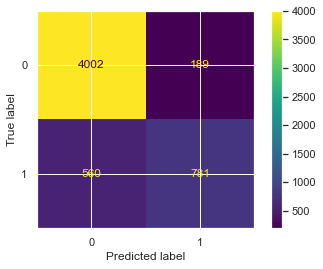

In [377]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

confusion_matrix(y_test, y_pred_test)

plot_confusion_matrix(bosque, X_test_copy, y_test)
plt.show()

Vemos que hay un total de 4002 de TP y un total de 781 de TN.

Métricas

In [378]:
from sklearn.metrics import classification_report

print("____ Train ____")
print(classification_report(y_train, y_pred_train))
print("____ Test ____")
print(classification_report(y_test, y_pred_test))

____ Train ____
              precision    recall  f1-score   support

           0       0.88      0.96      0.92     16762
           1       0.83      0.61      0.70      5362

    accuracy                           0.88     22124
   macro avg       0.86      0.78      0.81     22124
weighted avg       0.87      0.88      0.87     22124

____ Test ____
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      4191
           1       0.81      0.58      0.68      1341

    accuracy                           0.86      5532
   macro avg       0.84      0.77      0.80      5532
weighted avg       0.86      0.86      0.86      5532



Vemos que para el conjunto de evaluación bajo un poco la perfomance respecto a la clase 1, sin embargo para la clase 0 se mantiene casi igual que para el conjunto de entrenamiento.

Calculamos ROC AUC score

In [379]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
auc = round(roc_auc_score(y_test, y_pred_test), 4)
print(f"ROC AUC score = {auc}")

ROC AUC score = 0.7687


Graficamos la Curva ROC

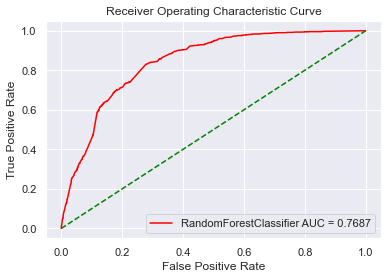

In [380]:
prob = bosque.predict_proba(X_test)
prob = prob[:, 1]
fper, tper, thresholds = roc_curve(y_test, prob)
plt.plot(fper, tper, color='red', label=f'RandomForestClassifier AUC = {auc}')
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend()

Features más importantes para el modelo

In [381]:
fi = pd.DataFrame(columns=["FEATURE", "IMPORTANCE"])
fi["FEATURE"] = X_train_copy.columns
fi["IMPORTANCE"] = bosque.feature_importances_
fi = fi.sort_values("IMPORTANCE", ascending=False)

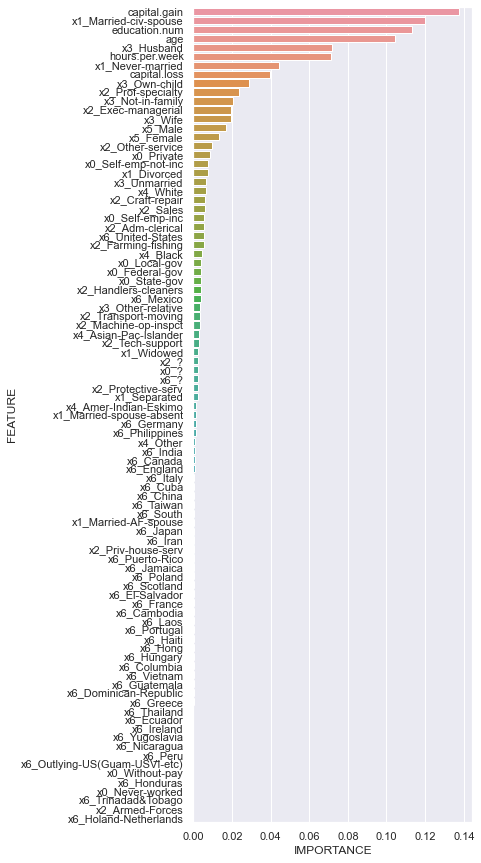

In [382]:
plt.figure(figsize=(5, 15))
sns.barplot(y=fi.FEATURE, x=fi.IMPORTANCE)
plt.show()

Vemos que hay un montón de features que no aportan nada al modelo, por lo cual podrían ser eliminadas, para simplificar el mismo.
Por otro lado, vemos que las features más representativas son:
- capital.gain
- education.num
- x3_Husband
- age
- x1_Married-civ-spouse
- hours.per.week
- x1_never_married
- capital.loss

### Aplicando a test.csv

Levantamos el archivo

In [383]:
df_test = pd.read_csv("CSV/test.csv")

Dropeamos columnas que no son necesarias

In [384]:
df_test.drop(columns=['index','education','ID'], inplace=True)

Aplicamos OneHotEncoder

In [385]:
categorical = ['workclass', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']

encoded = ohe.transform(df_test[categorical])
encoded_df = pd.DataFrame(
                    columns= ohe.get_feature_names(),
                    data= encoded,
                    index= df_test.index)

df_test = pd.concat([df_test, encoded_df], axis='columns')

df_test = df_test.drop(categorical, axis=1)

c:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Predecimos

In [386]:
y_test_pred_prod = bosque.predict(df_test)

Generamos el archivo resultado

In [387]:
df_submit = pd.read_csv("CSV/submit_example.csv")

df_submit['PRED'] = y_test_pred_prod

df_submit.to_csv('submit_example_randomforest.csv', sep=',', encoding='utf-8')

Se encontraron 821 personas con income > 50K de un total de 4881.

# Comparación de Modelos

A continuación mostramos las métricas de cada uno de los modelos que construimos.

<b>Baseline:</b>
- Tiene un accuracy de 0.76
- Para la clase 0 tiene un precision=0.76, un recall=1 y un f1-score=0.86
- Para la clase 1 tiene un precision=0, un recall=0 y un f1-score=0

<b>DecisionTreeClassifier:</b>
- Para el conjunto de train
    - Tiene un accuracy de 0.83
    - Para la clase 0 tiene un precision=0.85, un recall=0.95 y un f1-score=0.90
    - Para la clase 1 tiene un precision=0.74, un recall=0.49 y un f1-score=0.59
   
- Para el conjunto de test
    - Tiene un accuracy de 0.83
    - Para la clase 0 tiene un precision=0.85, un recall=0.95 y un f1-score=0.90
    - Para la clase 1 tiene un precision=0.74, un recall=0.48 y un f1-score=0.59
    
- Para las personas del archivo test.csv, predijo que hay un total de 905 personas con ingresos mayores a 50K.

<b>KNNClassifier:</b>
- Para el conjunto de train
    - Tiene un accuracy de 0.85
    - Para la clase 0 tiene un precision=0.88, un recall=0.93 y un f1-score=0.90
    - Para la clase 1 tiene un precision=0.73, un recall=0.59 y un f1-score=0.65
    
- Para el conjunto de test
    - Tiene un accuracy de 0.84
    - Para la clase 0 tiene un precision=0.87, un recall=0.93 y un f1-score=0.90
    - Para la clase 1 tiene un precision=0.72, un recall=0.57 y un f1-score=0.64
    
- Para las personas del archivo test.csv, predijo que hay un total de 903 personas con ingresos mayores a 50K.

<b>RandomForestClassifier:</b>
- Para el conjunto de train
    - Tiene un accuracy de 0.87
    - Para la clase 0 tiene un precision=0.88, un recall=0.96 y un f1-score=0.92
    - Para la clase 1 tiene un precision=0.83, un recall=0.61 y un f1-score=0.70
    
- Para el conjunto de test
    - Tiene un accuracy de 0.87
    - Para la clase 0 tiene un precision=0.88, un recall=0.96 y un f1-score=0.92
    - Para la clase 1 tiene un precision=0.82, un recall=0.58 y un f1-score=0.68
    
- Para las personas del archivo test.csv, predijo que hay un total de 921 personas con ingresos mayores a 50K.


Vemos que:
- Los tres modelos tienen mejores métricas que el Baseline.
- El RandomForestClassifier tiene el accuracy más alto para el conjunto de test.
- El RandomForestClassifier tiene precision, recall y f1-score más alto que los demás para el conjunto de test.
- El modelo que menos instancias clasificó fue el DecisionTreeClassifier, mientras que el que más instancias clasificó fue el RandomForestClassifier.

A partir del análsis realizado vemos que el mejor modelo fue el RandomForestClassifier. Sin embargo, viendo las métricas de cada uno de los modelos, estas se encuentran muy cercanas entre sí.


# Conclusión

A lo largo de todo el trabajo pudimos analizar estadísticamente el dataset de personas, generando al final del mismo diferentes modelos que se encargon de predecir el income de un conjunto de personas distintos al utilizado para entrenamiento.

Comenzamos viendo que el dataset posee 27657 filas y 16 columnas, de las cuales no hay ningún valor nulo. 

Posteriormente analizamos las variables categóricas y vimos que:
- La mayoría de las personas trabajan en el ambito privado.
- La mayoría de las personas terminaron la secundaria.
- Las personas casadas predominan en el conjunto.
- Las personas de raza blanca son mayoritarias en el conjunto.
- Hay predominancia de hombres.
- Casi la totalidad de las personas son de EEUU.

Luego analizamos las variables numéricas, y vimos que:
- La edad media de las personas es de 36 años.
- La mayoría de las personas ganan menos de $1000.
- El capital.loss son valores mínimos comparados al capital.gain
- La media de horas trabajadas por semana es de 40hs.

Después analizamos el target, es decir la variable "income", y observamos lo siguiente:
- Las clases "<=50K" y ">50K" están totalmente desbalanceadas, debido a que hay un 76% de la clase "<=50K". Como consecuencia, se tuvo esto en cuenta en las siguientes secciones del trabajo.
- Solo un 15% del dataset trabaja en el ambito privado y gana más de 50K
- Un 7% del total de personas gana más de 50K y son licenciados.
- Hay un 20.55% del total que gana más de 50K y son casados.

Seguidamente, analizamos las correlaciones entre los features:
- Primero generamos un pairplot, luego vimos la correlacipón entre el nivel de educación, edad y sexo, y finalmente generamos la matriz de correlación.
- Observamos que las variables tienen muy poca correlación. Nuestra intuición era que a mayor edad mayor ingresos pero esto no se vió reflejado en la matriz de correlación. Sin embargo, las correlaciones más fuertes están entre el nivel educativo e ingresos, edad e ingresos y horas por semana e ingresos, lo cual tiene sentido.

Una vez terminado nuestro análisis de los datos, procedimos a separar los mismos para generar el conjunto de entrenamiento y de pruebas necesarios para los modelos predictivos. Debido a que el dataset está desbalanceado, tuvimos que utilizar el hiperparámeto stratify=y al momento de hacer el train_test_split.

Como paso siguiente, aplicamos OneHotEncoder a las variables categóricas para convertilas a numéricas, paso necesario para que los modelos puedan trabajar. También codificamos nuestro target a valores 0 y 1, donde 0 representa a la clase "<=50K" y 1 representa ">50K", esto lo hicimos por la misma razón anterior.

Posteriormente, decidimos utilizar 3 modelos: DecisionTreeClassifier, KNNClassifier y el RandomForestClassifier. Tomamos como modelo de referencia al "Baseline", el cual siempre predice que una entrada va a pertenecer a la clase "<=50K", considerando que el dataset está desbalanceado. El accuracy de éste último es de 0.76.

Para cada uno de los modelos, aplicamos GridSearch para obtener los mejores valores para los hiperparámetros que nosotros definimos. A partir de estos resultados, construimos los modelos, los cuales fueron entrenados y testeados con los datos brindados por el dataset "train.csv", para luego predecir sobre los datos del "test.csv". Además, para cada uno de ellos se analizó el accuracy, precision, recall y f1-score tanto para el conjunto de entrenamiento como para el de evaluación.

Finalmente, vimos que el RandomForestClassifier fue el mejor modelo, debido a que sus métricas superaban al resto de los modelos. Cabe destacar que las métricas de los tres modelos en conjunto estaban muy cercanas entre sí.


A modo de conclusión, a partir de este trabajo pudimos acentar conocimientos relacionados al análisis de un dataset para poder finalmente construir modelos supervisados que predigan si, ante ciertas entradas, pertenece a una clase o a otra. Adquirimos experiencia en el uso de herramientas y librerías para poder realizar esta tarea, además de cómo llevar a cabo este procesamiento a partir de una secuencia de pasos ordenadas, comenzando desde el análisis estadístico de nuestros features y target finalizando con la construcción de tres modelos de clasificación y sus métricas. 


